In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', 700)
pd.set_option('display.max_rows', 400)
pd.set_option('display.min_rows', 10)
pd.set_option('display.expand_frame_repr', True)

In [8]:
df = pd.read_csv("insurance_claims.csv")

In [9]:
# Explore the features available in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                   NaN             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [12]:
df.shape

(1000, 40)

In [11]:
# let's describe the data
# It will demonstrate the count, mean, std dev, min, max, etc values for the Numerical features present in the data.

df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [13]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [14]:
# Check the null values if any
df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted           True
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
witnesses                      False
police_report_available        False
total_claim_amount             False
injury_claim                   False
property_claim                 False
vehicle_claim                  False
auto_make                      False
auto_model                     False
auto_year                      False
fraud_reported                 False
_c39                            True
dtype: bool

authorities_contacted, _c39 has null values

In [15]:
#Checking for missing values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available           0
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0
auto_model                        0
auto_year                         0
fraud_reported                    0
_c39                           1000
dtype: int64

In [16]:
#Number of unique values in each column
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries                   3
witnesses                         4
police_report_available           3
total_claim_amount              763
injury_claim                    638
property_claim                  626
vehicle_claim                   726
auto_make                        14
auto_model                       39
auto_year                        21
fraud_reported                    2
_c39                              0
dtype: int64

In [17]:
# As _c39 does not have values dropping it
df = df.drop('_c39',axis=1)

In [18]:
# Count number of frauds vs non-frauds
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [19]:
df['incident_state'].value_counts()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

In [19]:
df['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

In [20]:
df['property_damage'].value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [21]:
df['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [39]:
# missing value treatment using fillna

# we will replace the '?' by the most common collision type as we are unaware of the type.
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)
df['collision_type'] = df['collision_type'].replace('?', np.nan)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
df['property_damage'].fillna('NO', inplace = True)
df['property_damage'] = df['property_damage'].replace('?', np.nan)

# again, if there are no responses fpr police report available then we might take it as No report available
df['police_report_available'].fillna('NO', inplace = True)
df['police_report_available'] = df['police_report_available'].replace('?', np.nan)

df.isnull().any().any()

np.False_

In [35]:
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

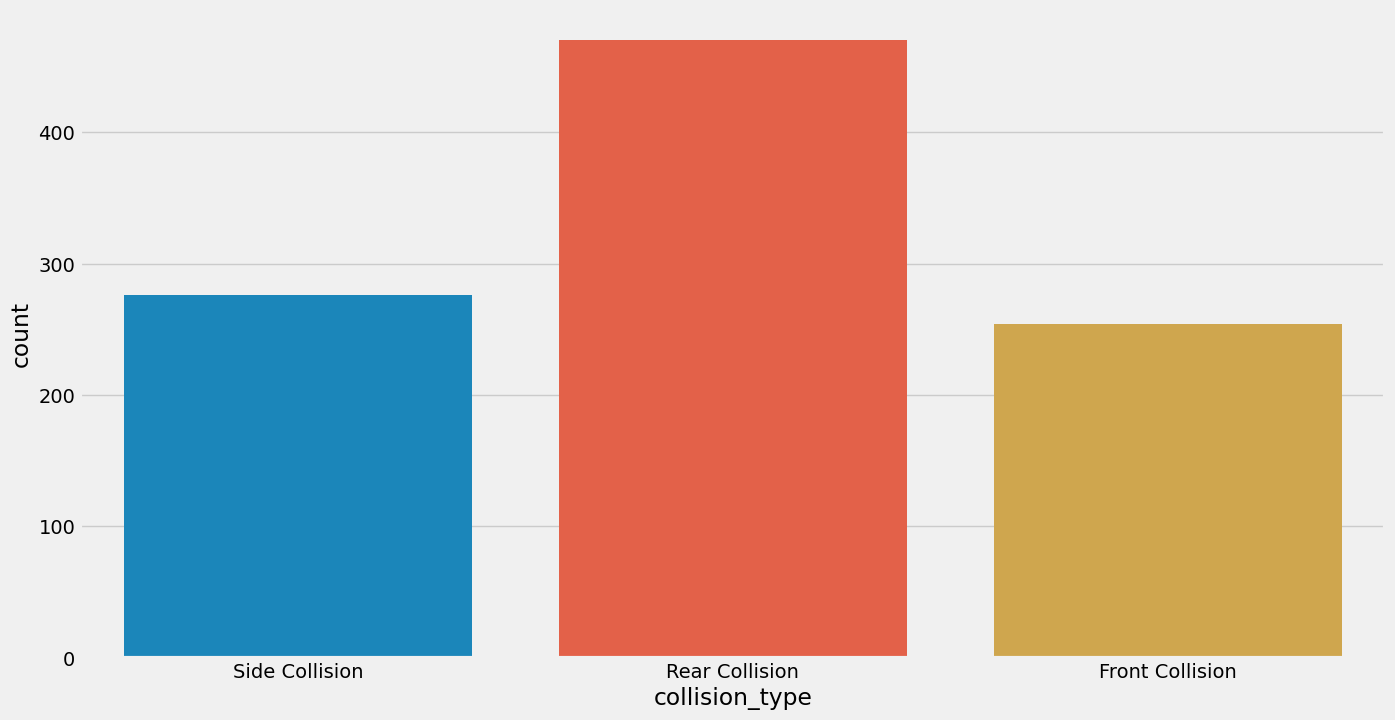

In [40]:
df['collision_type'].value_counts()
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='collision_type', data=df, hue='collision_type')

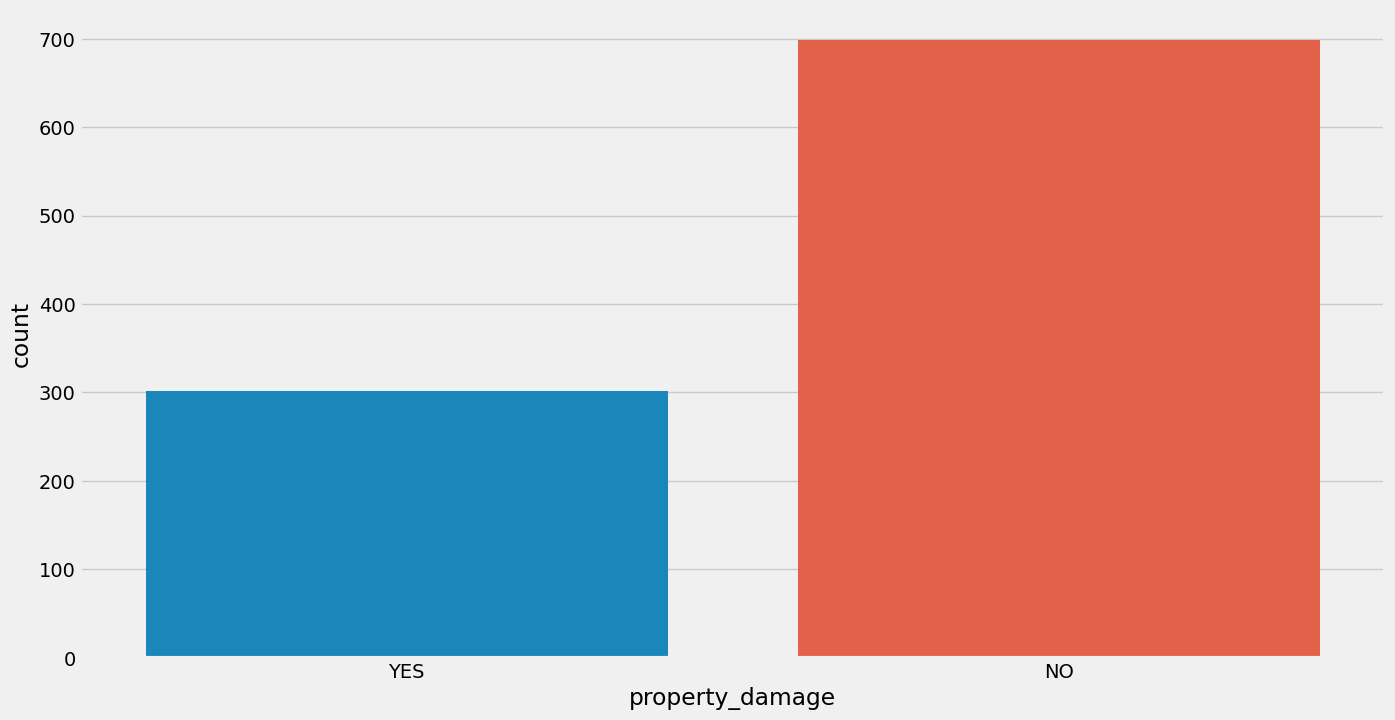

In [41]:
df['property_damage'].value_counts()
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='property_damage', data=df, hue='property_damage')

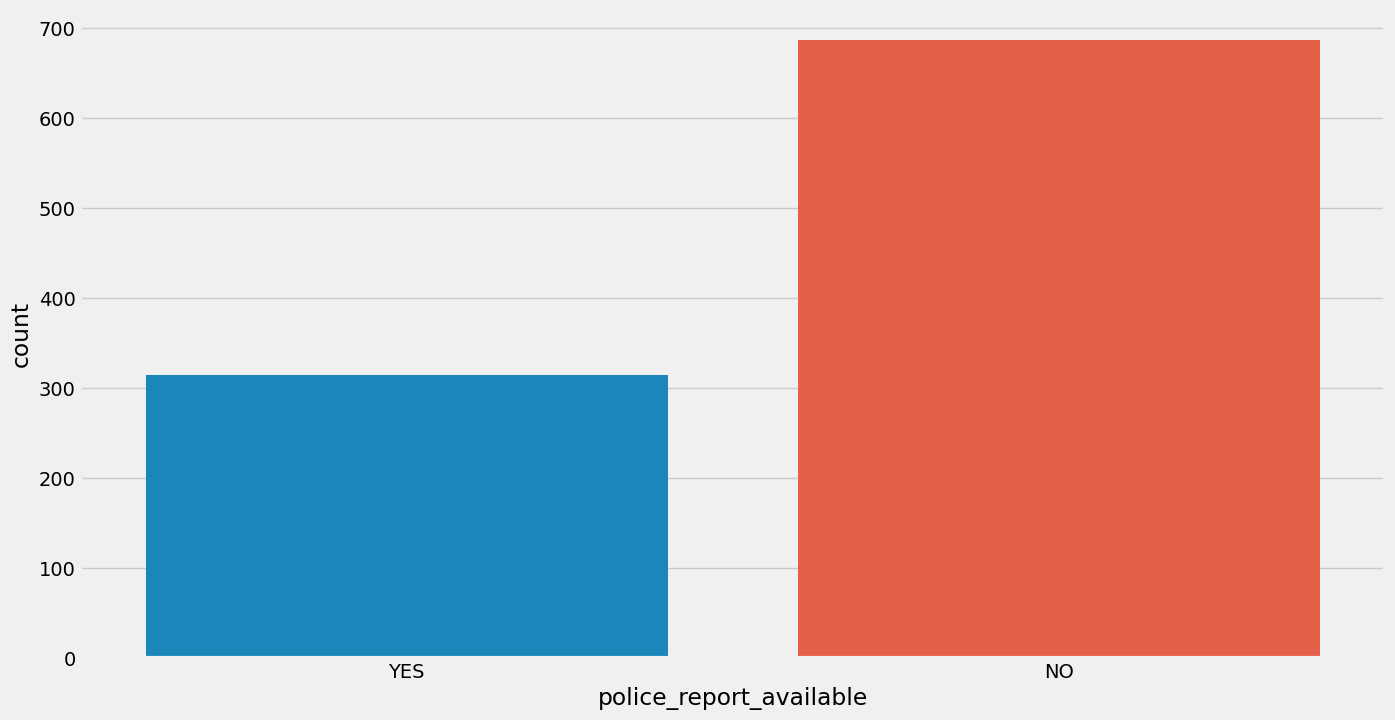

In [42]:
df['police_report_available'].value_counts()
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='police_report_available', data=df, hue='police_report_available')

In [23]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
auto_make                       0
auto_model                      0
auto_year                       0
fraud_reported                  0
dtype: int64

In [24]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [25]:
df['authorities_contacted'].fillna('NO', inplace = True)


In [26]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
NO            91
Name: count, dtype: int64

Now the data is fixed now so it is good to go with visualazation.

**Data Visualization**

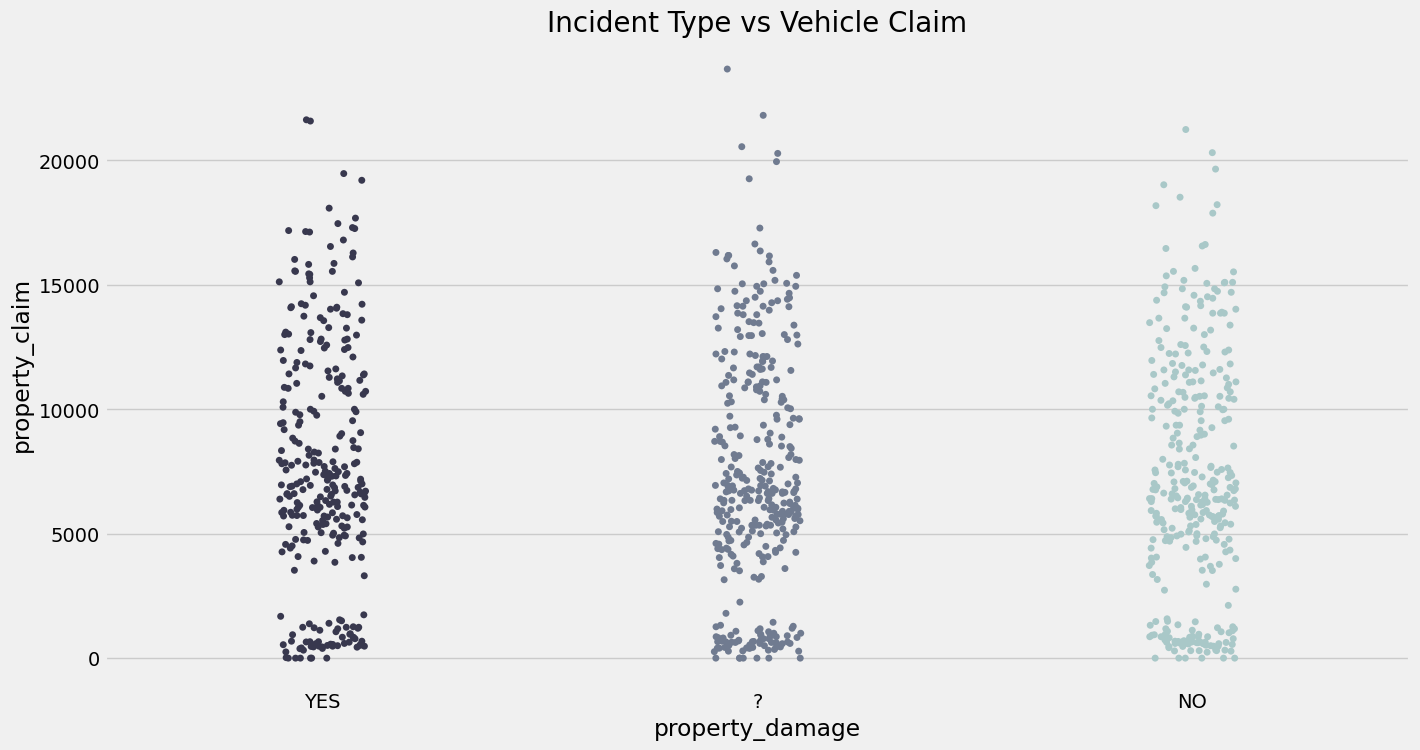

In [27]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.stripplot(data =df,x='property_damage', y='property_claim', palette = 'bone')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

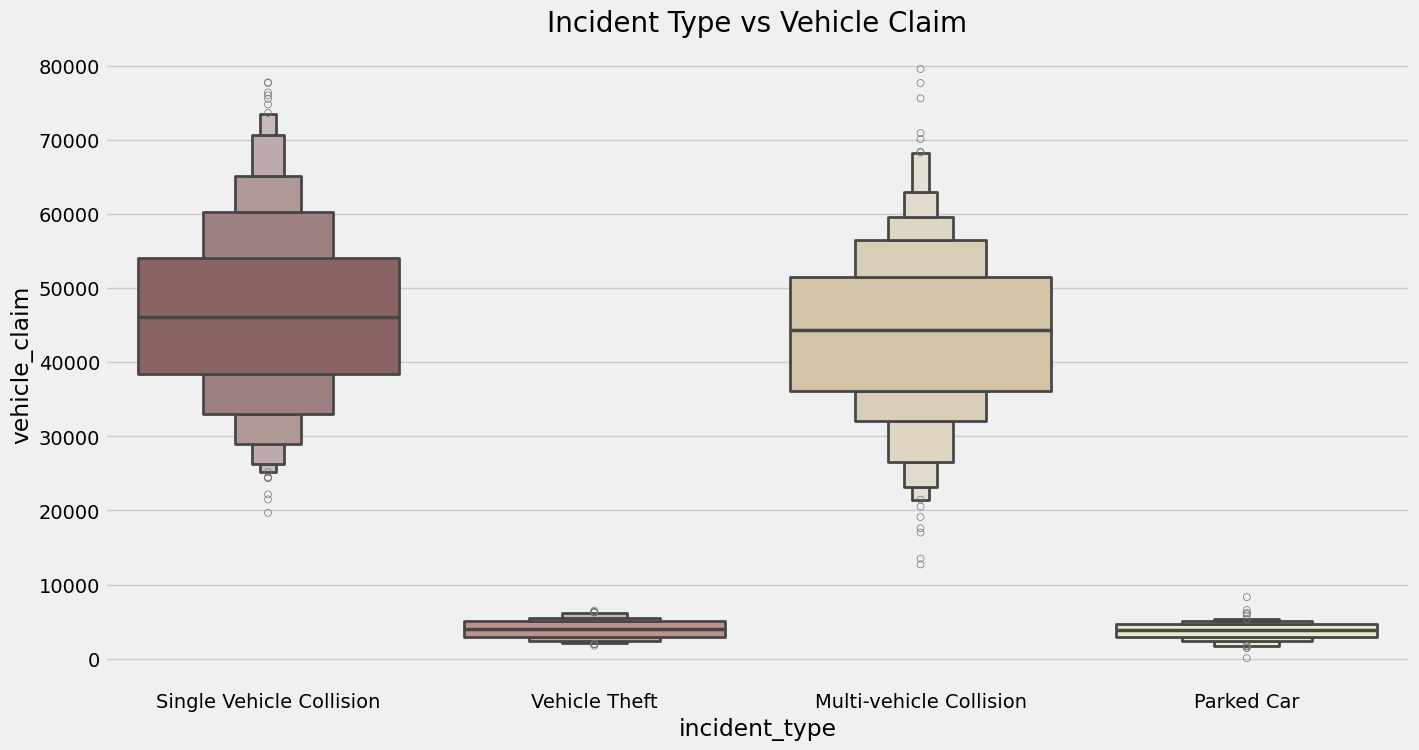

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data = df,x='incident_type', y='vehicle_claim', palette = 'pink')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

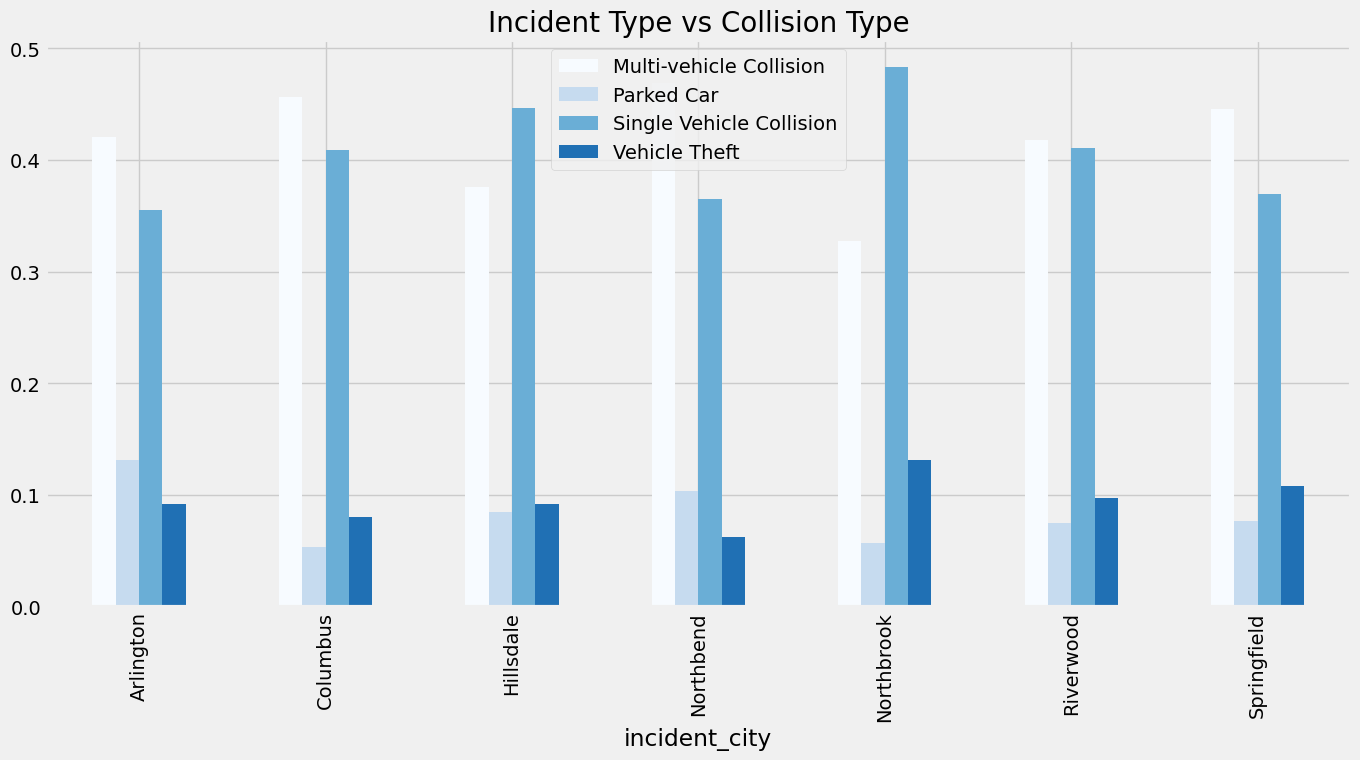

In [46]:
incident = pd.crosstab(df['incident_city'], df['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

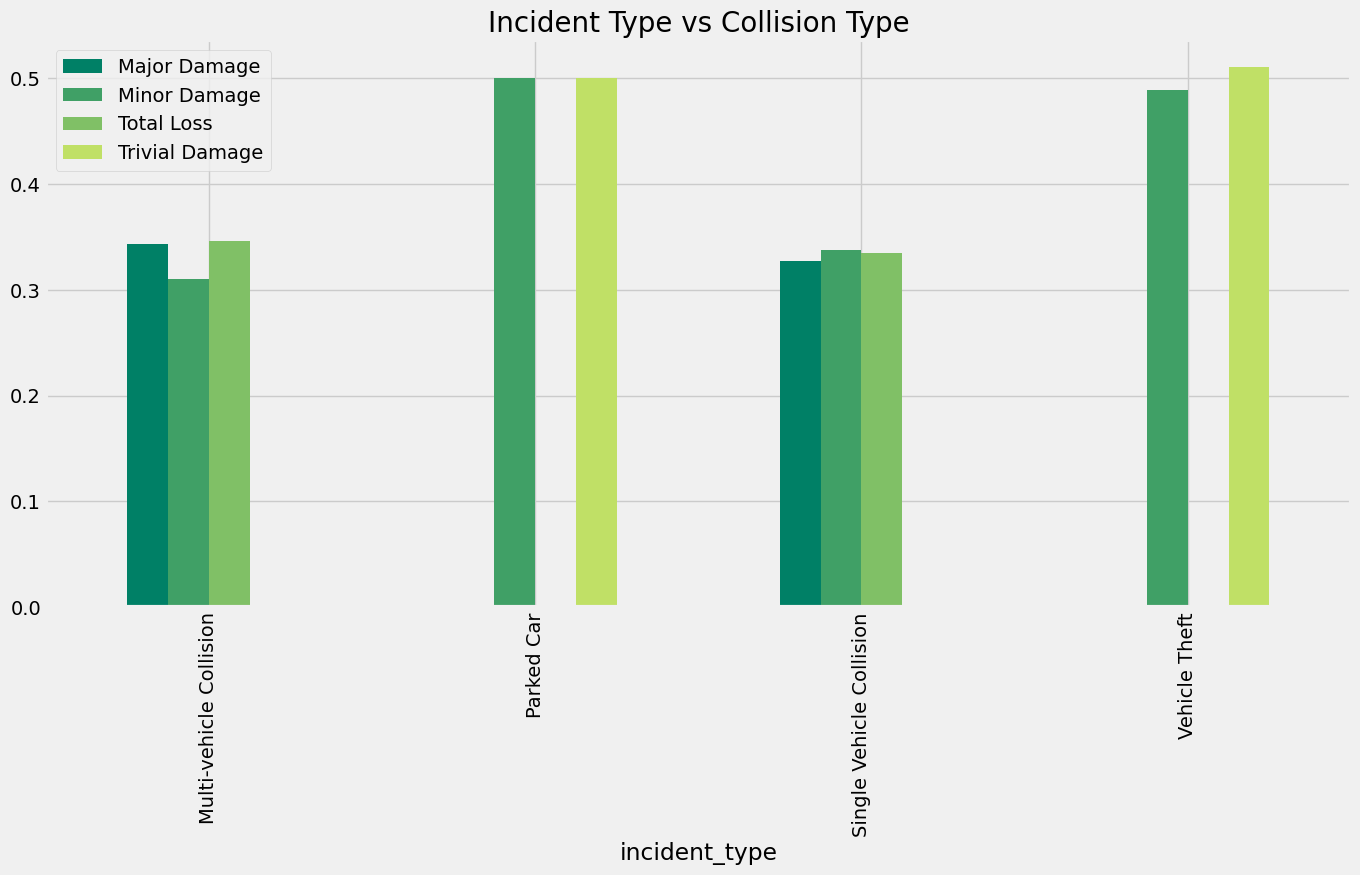

In [47]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

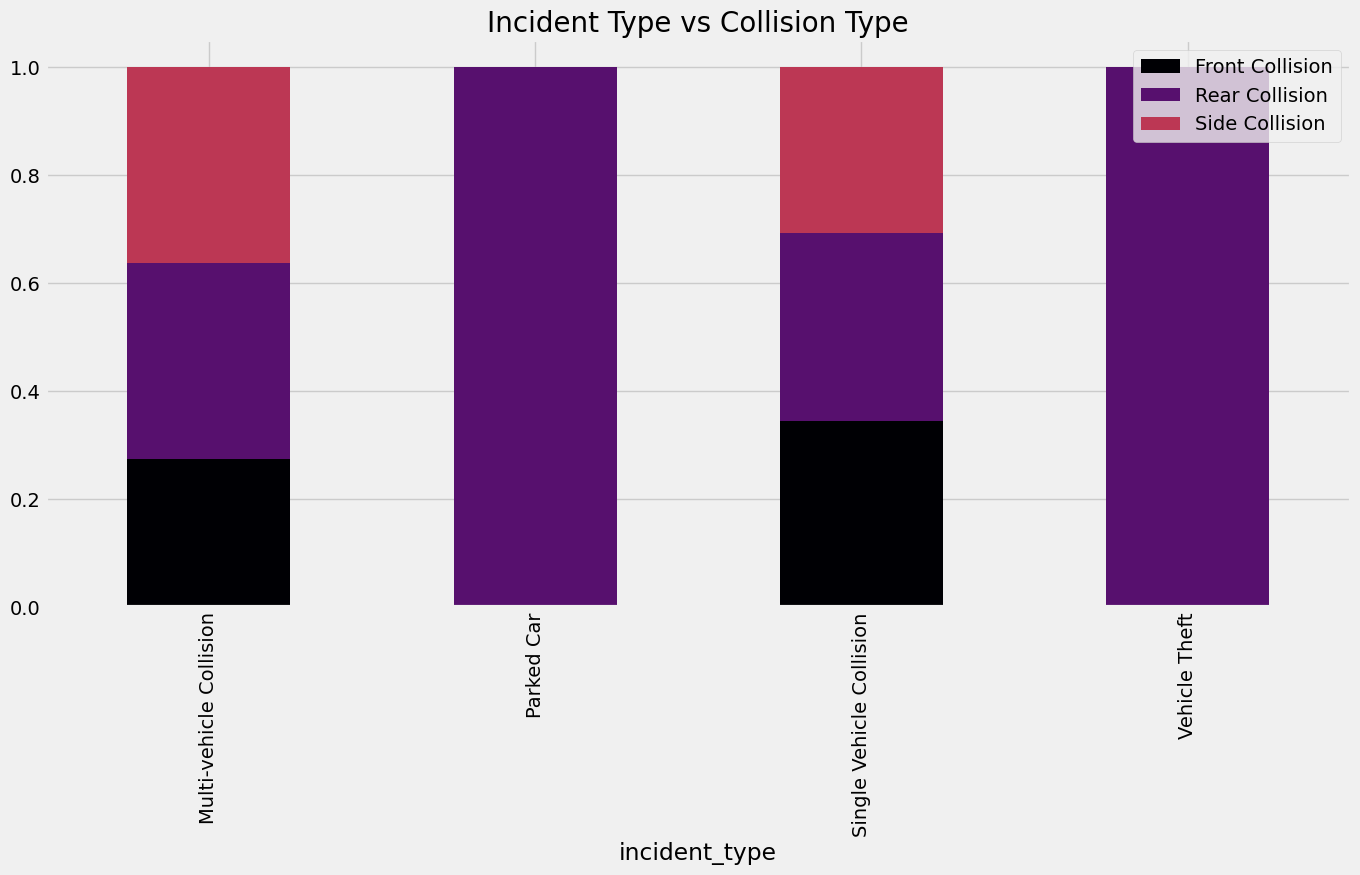

In [48]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

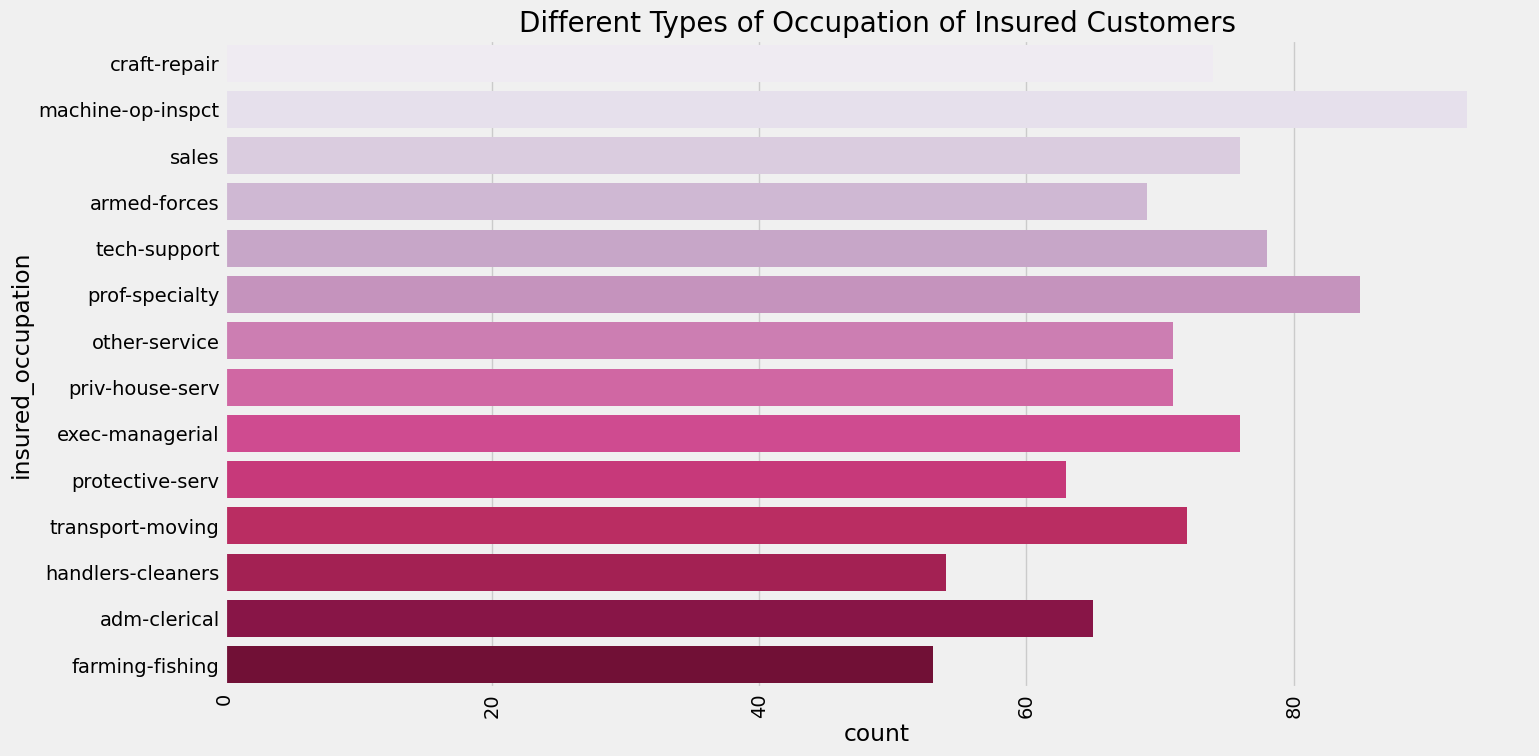

In [49]:
# let's check the insured hobbies

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(df['insured_occupation'], palette = 'PuRd')
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

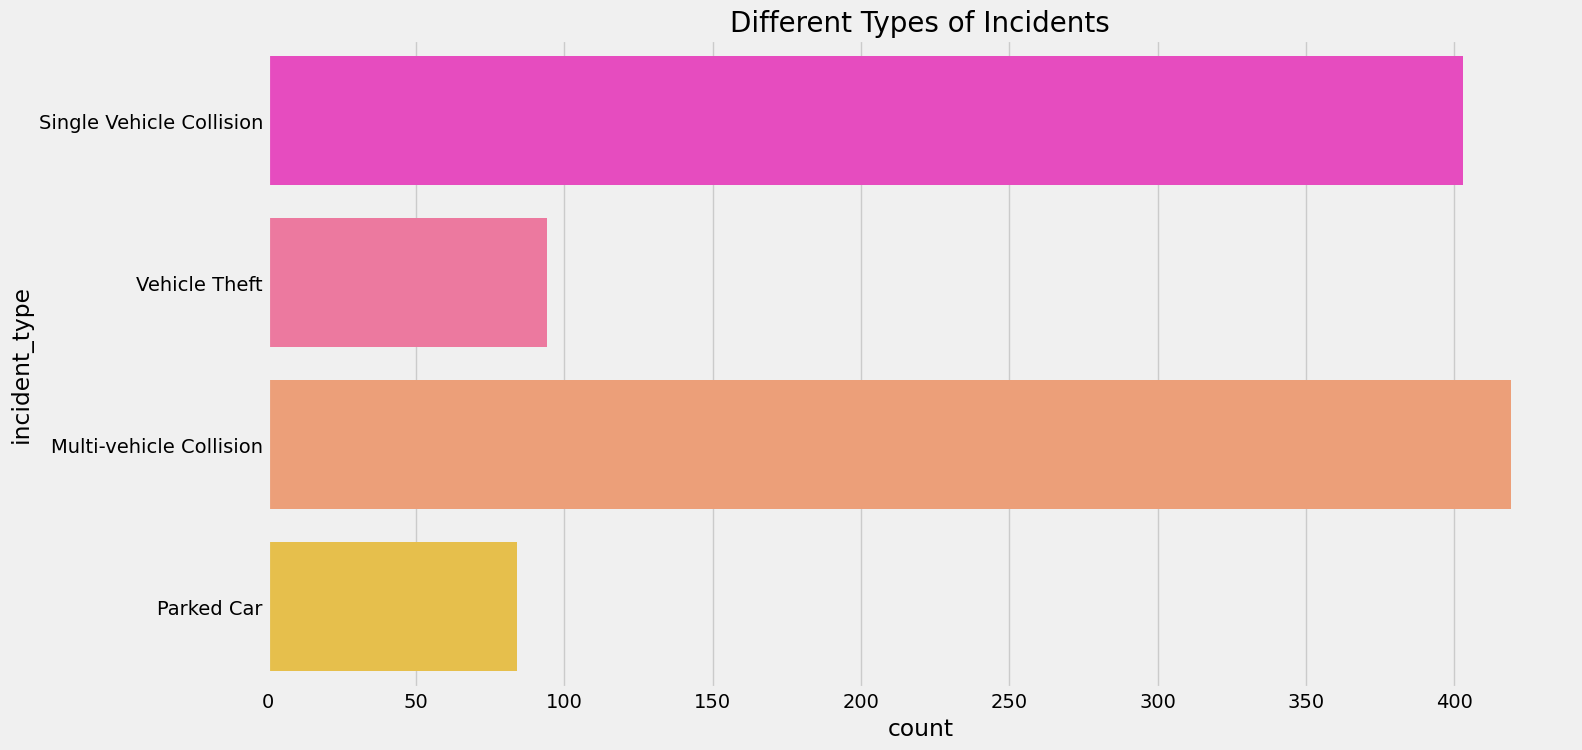

In [50]:
# let's check the incident types

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(df['incident_type'], palette = 'spring')
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

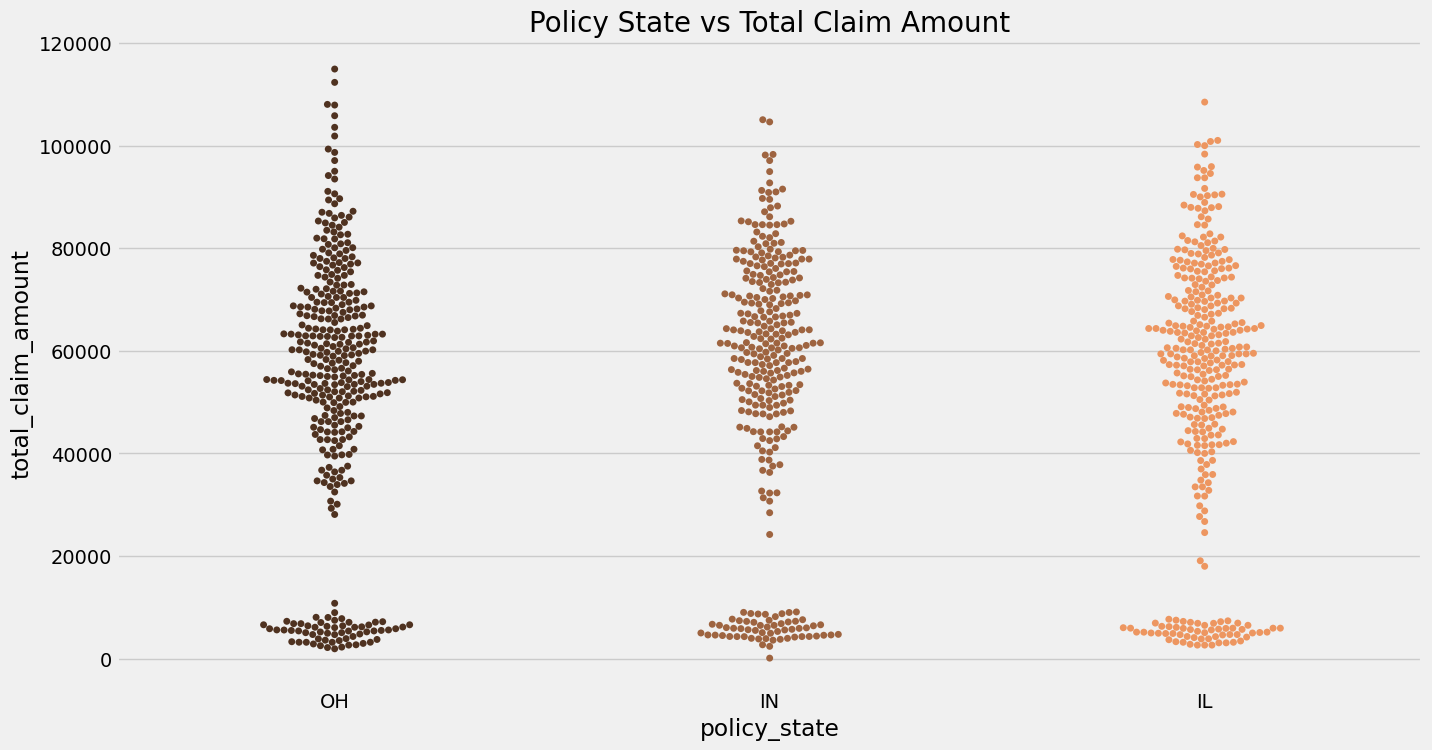

In [52]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.swarmplot(data = df, x='policy_state', y='total_claim_amount', palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

In [55]:
from pandas.plotting import parallel_coordinates

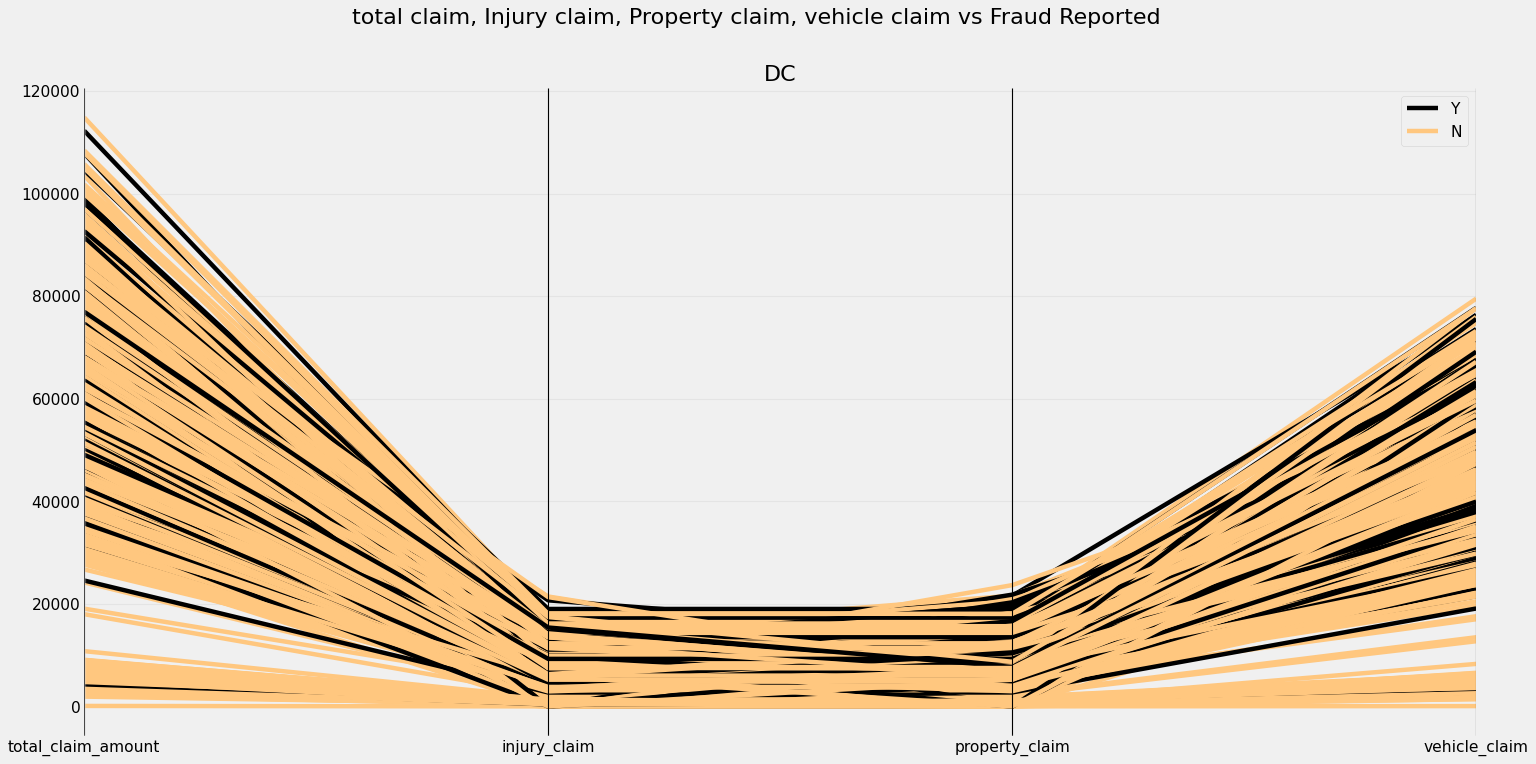

In [57]:
plt.figure(figsize=(20, 10), dpi= 80)

parallel_coordinates(df[['total_claim_amount','injury_claim', 'property_claim','vehicle_claim','fraud_reported']],
                     'fraud_reported',  colormap = 'copper')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('DC', fontsize = 20)
plt.grid(alpha=0.3)


plt.suptitle('total claim, Injury claim, Property claim, vehicle claim vs Fraud Reported', fontsize = 20)
plt.show()

In [58]:
# Count number of frauds vs non-frauds
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

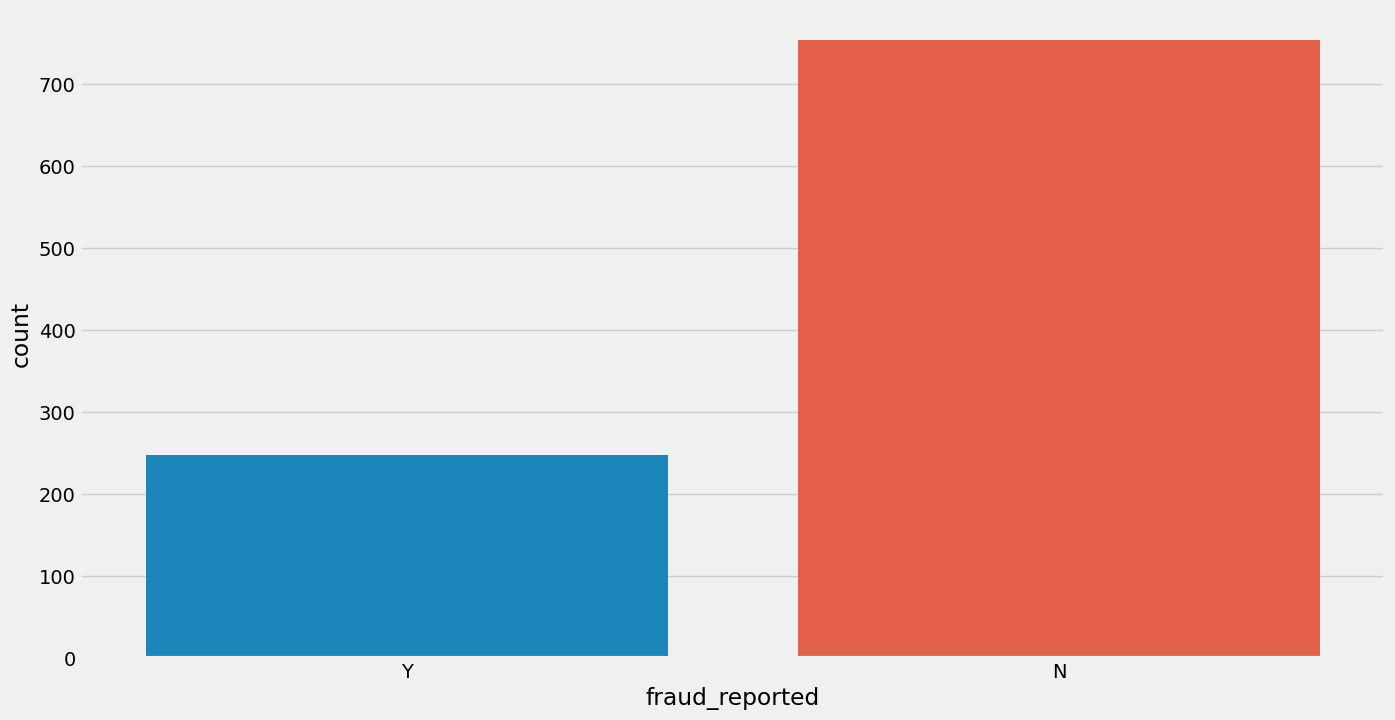

In [43]:
df['fraud_reported'].value_counts()
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

In [59]:
df['incident_state'].value_counts()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

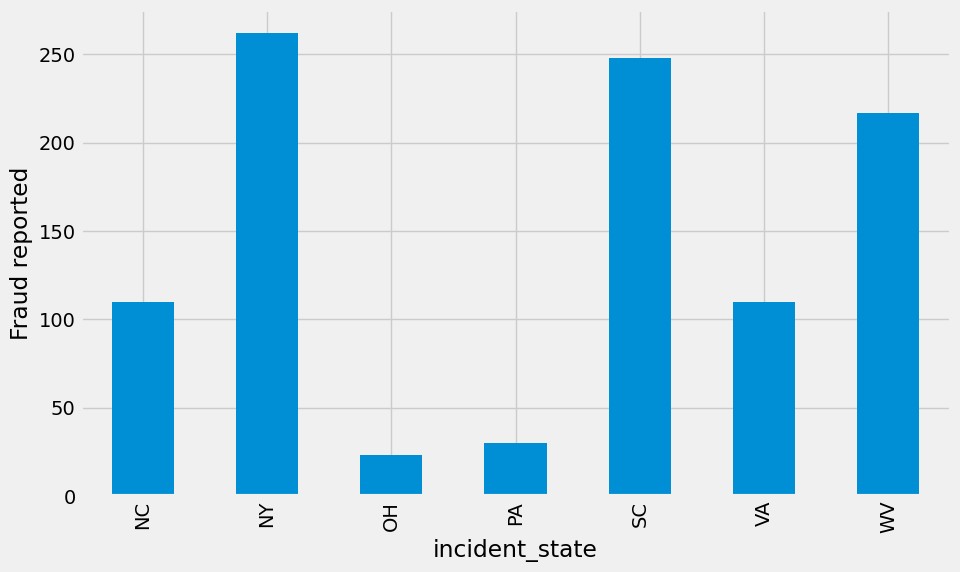

In [60]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

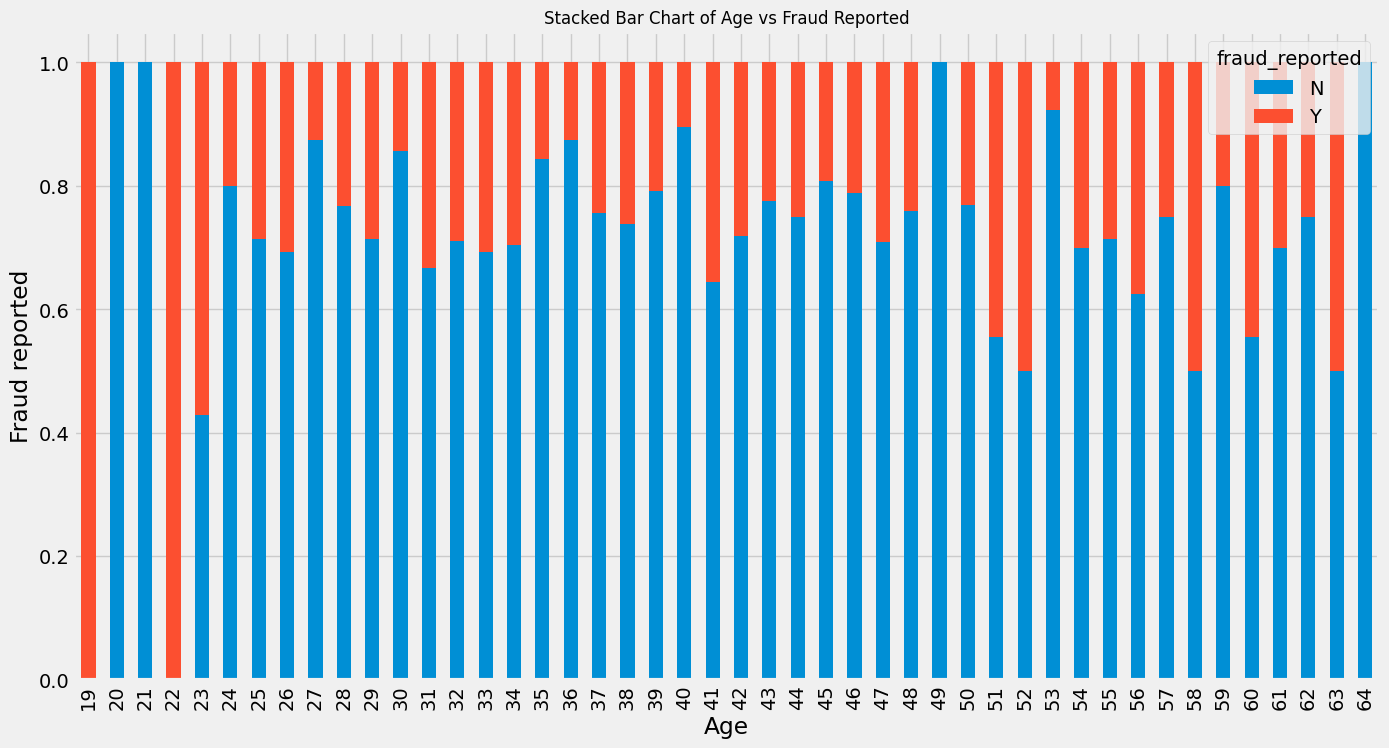

In [61]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()

From above plot, it is obvious that, age is an important predictor for fraud reported. Age between 19-23 shows substantial number od fraud report.

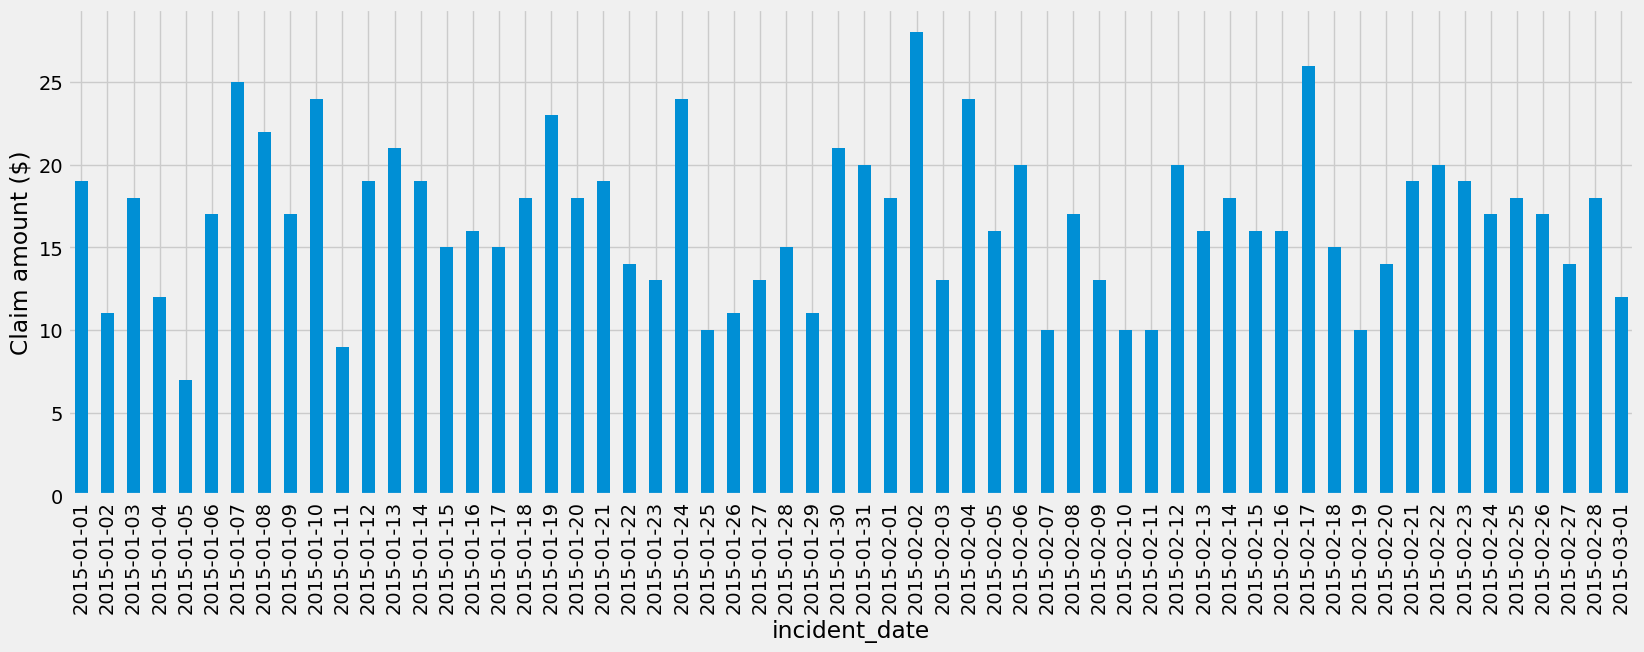

In [62]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

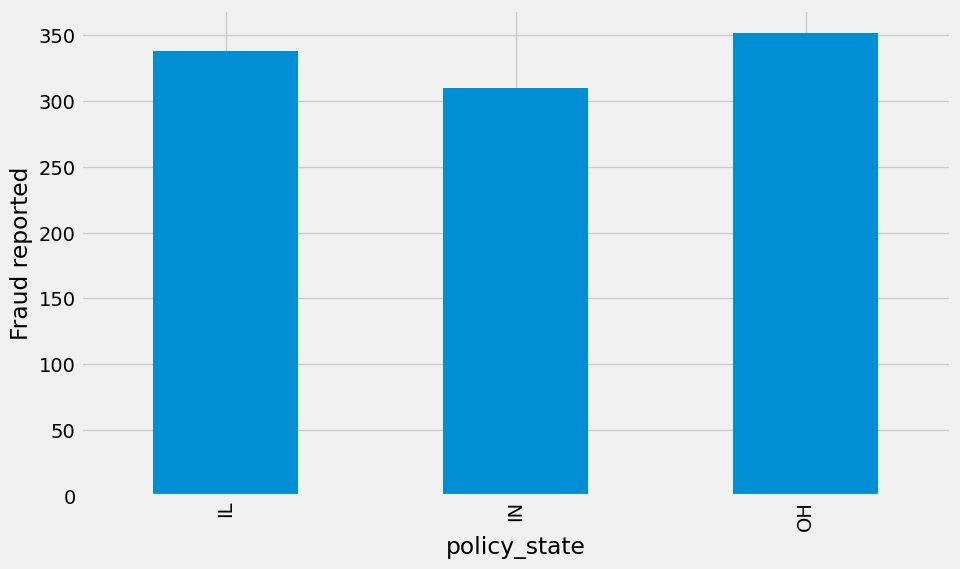

In [63]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

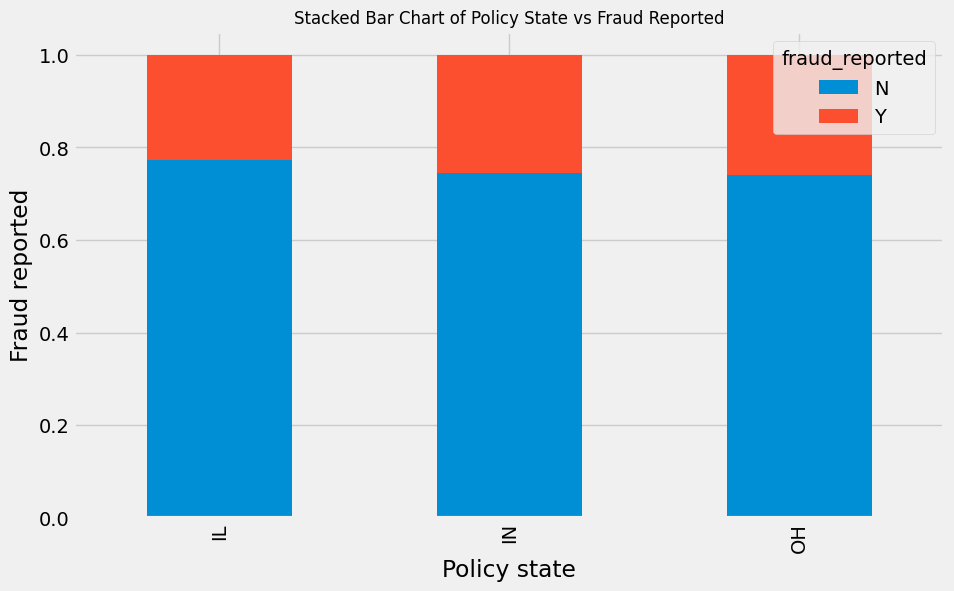

In [64]:
plt.rcParams['figure.figsize'] = [10, 6]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.policy_state, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy state')
plt.ylabel('Fraud reported')
plt.show()

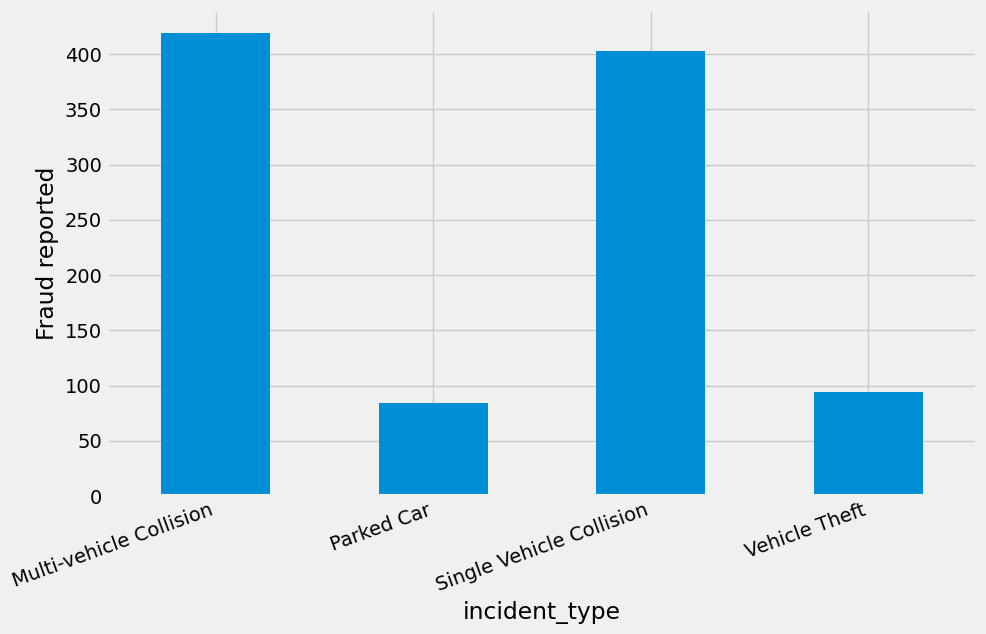

In [65]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

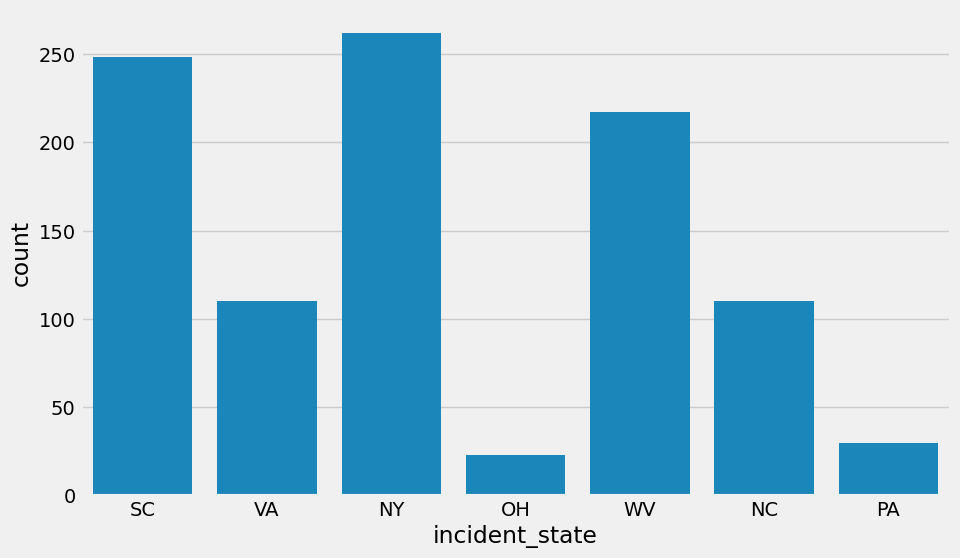

In [66]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

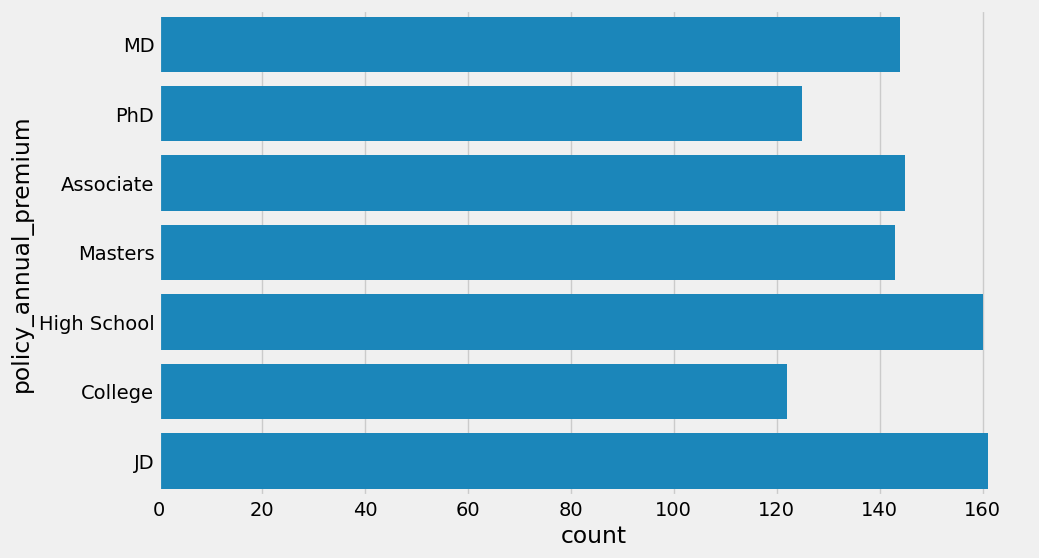

In [67]:
# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df)
ax.set_ylabel('policy_annual_premium')
plt.show()

Text(0, 0.5, 'Fraud reported')

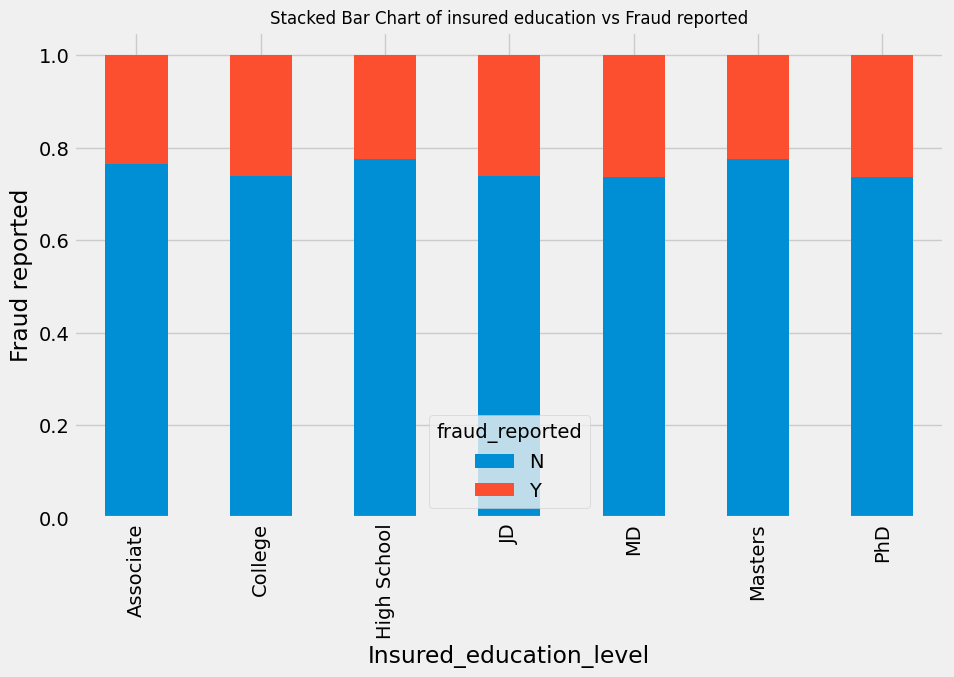

In [68]:
plt.rcParams['figure.figsize'] = [10, 6]
table=pd.crosstab(df.insured_education_level, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured education vs Fraud reported', fontsize=12)
plt.xlabel('Insured_education_level')
plt.ylabel('Fraud reported')

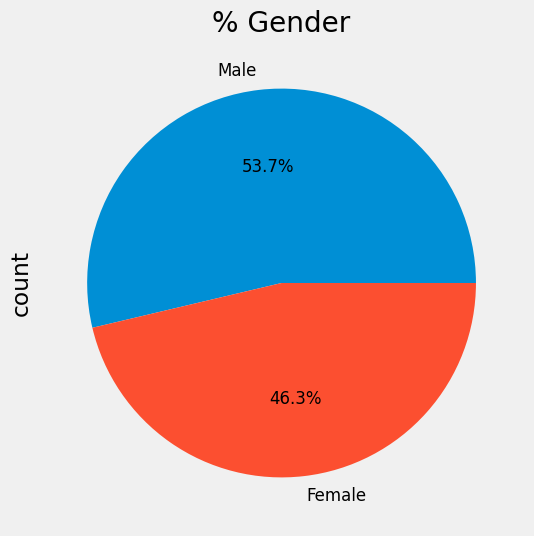

In [69]:
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)
ax.set_title('% Gender')
plt.show()

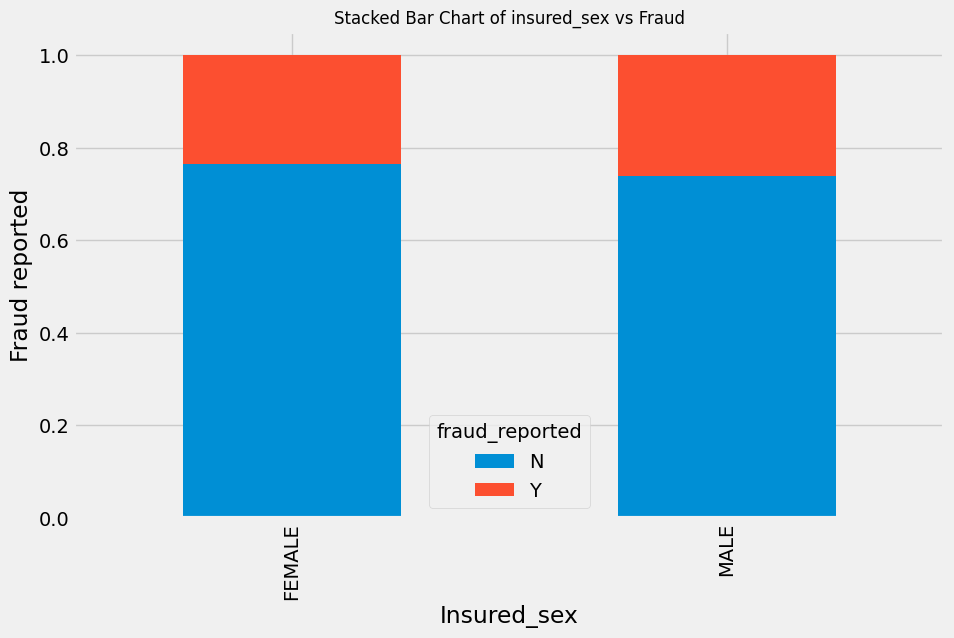

In [70]:
table=pd.crosstab(df.insured_sex, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_sex vs Fraud', fontsize=12)
plt.xlabel('Insured_sex')
plt.ylabel('Fraud reported')
plt.show()

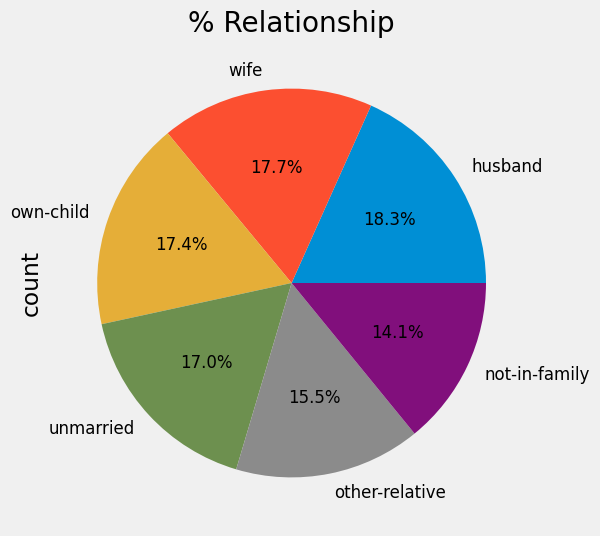

In [71]:
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)
ax.set_title('% Relationship')
plt.show()

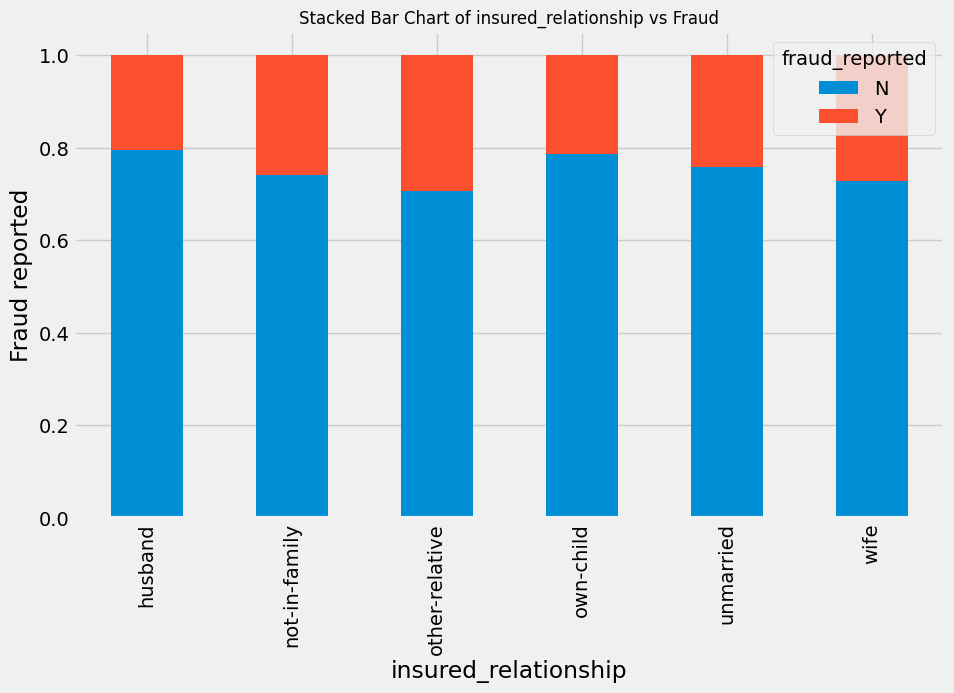

In [72]:
table=pd.crosstab(df.insured_relationship, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('insured_relationship')
plt.ylabel('Fraud reported')
plt.show()

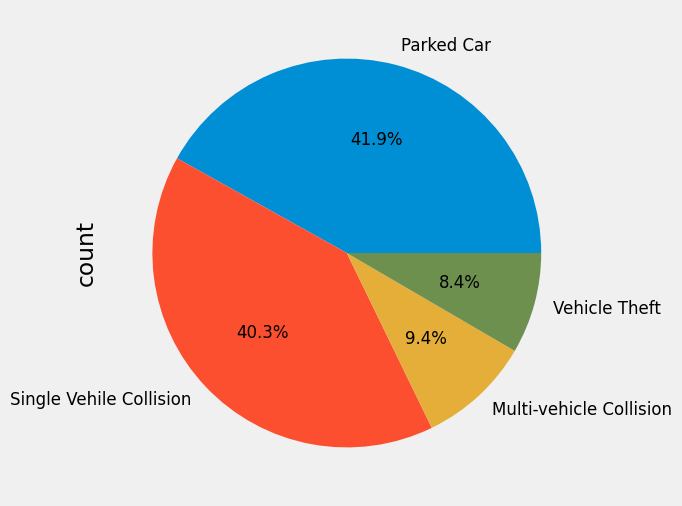

In [73]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12)

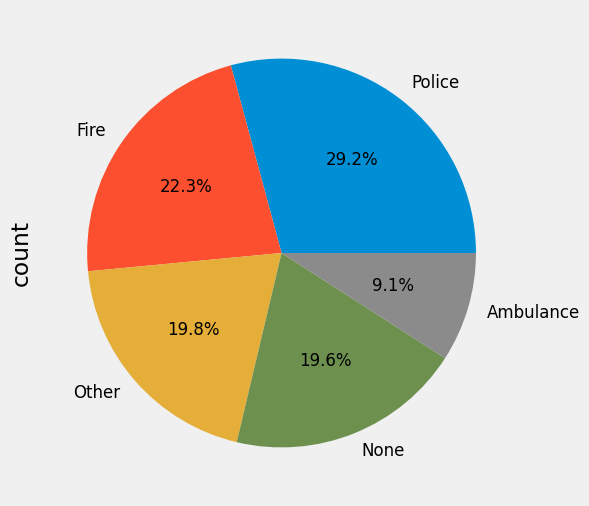

In [74]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)

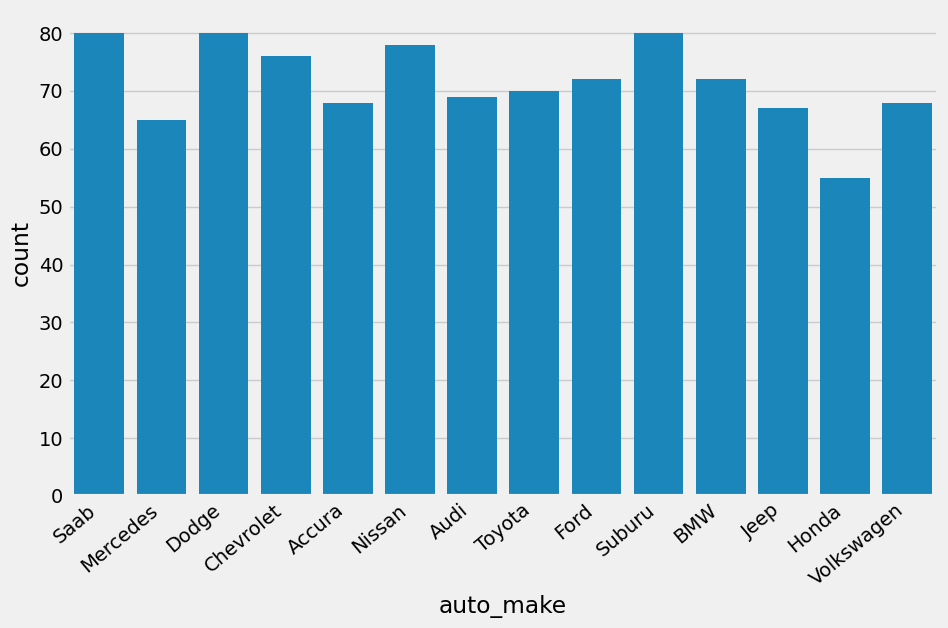

In [75]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

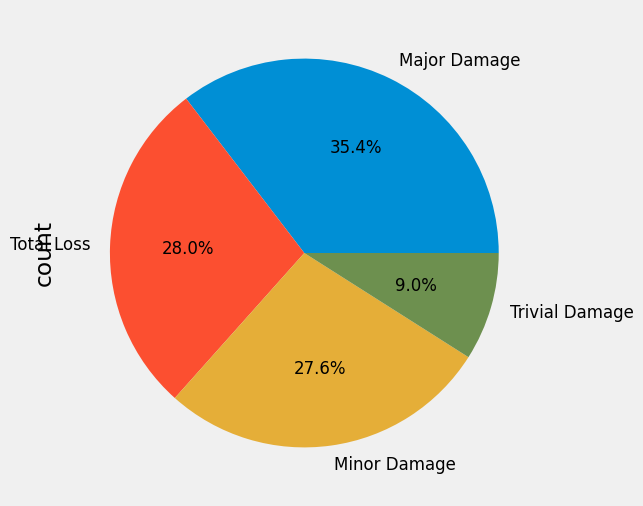

In [76]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

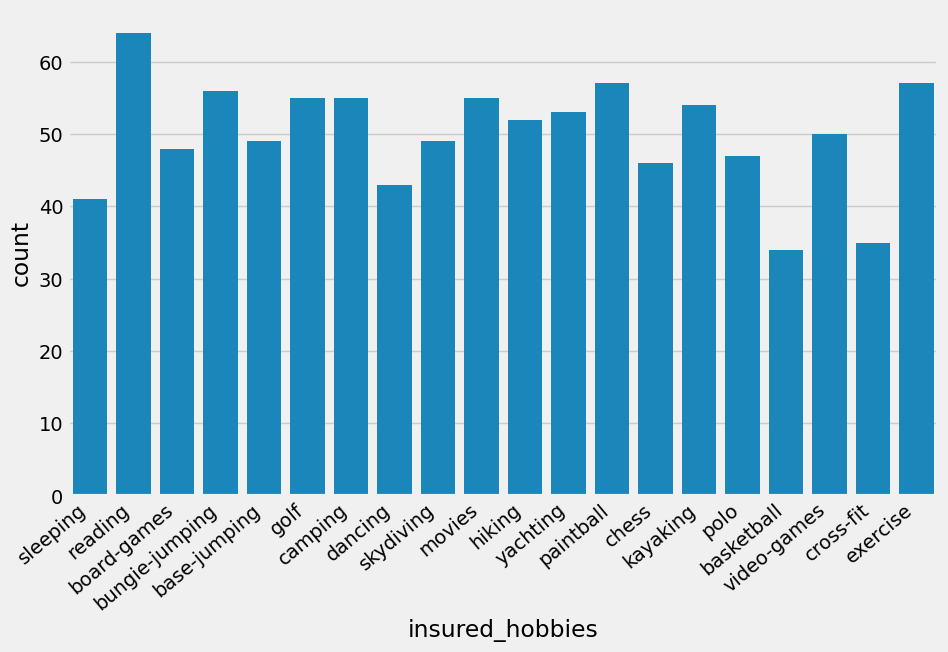

In [77]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [78]:
df["insured_occupation"].value_counts()

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64

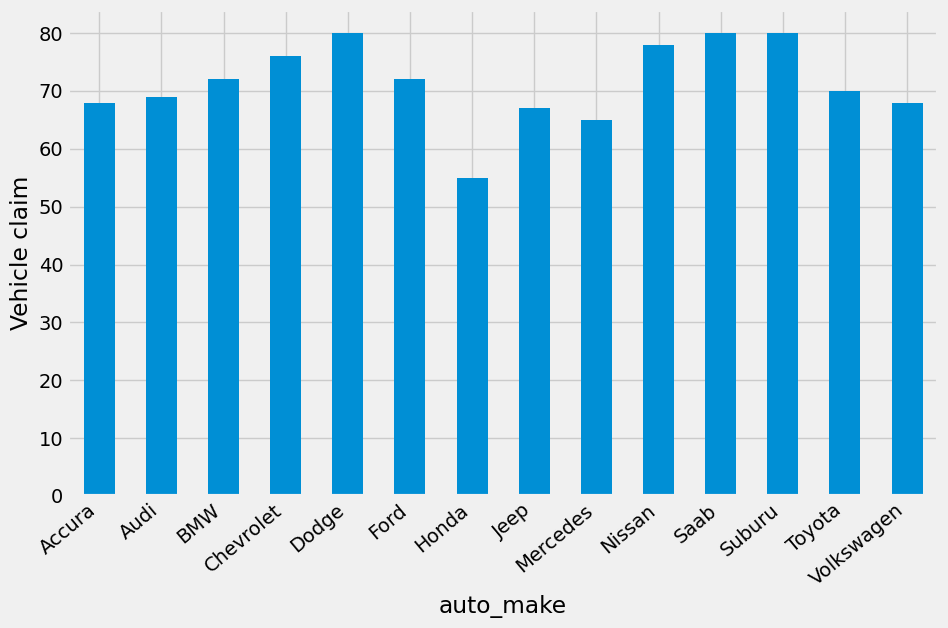

In [79]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

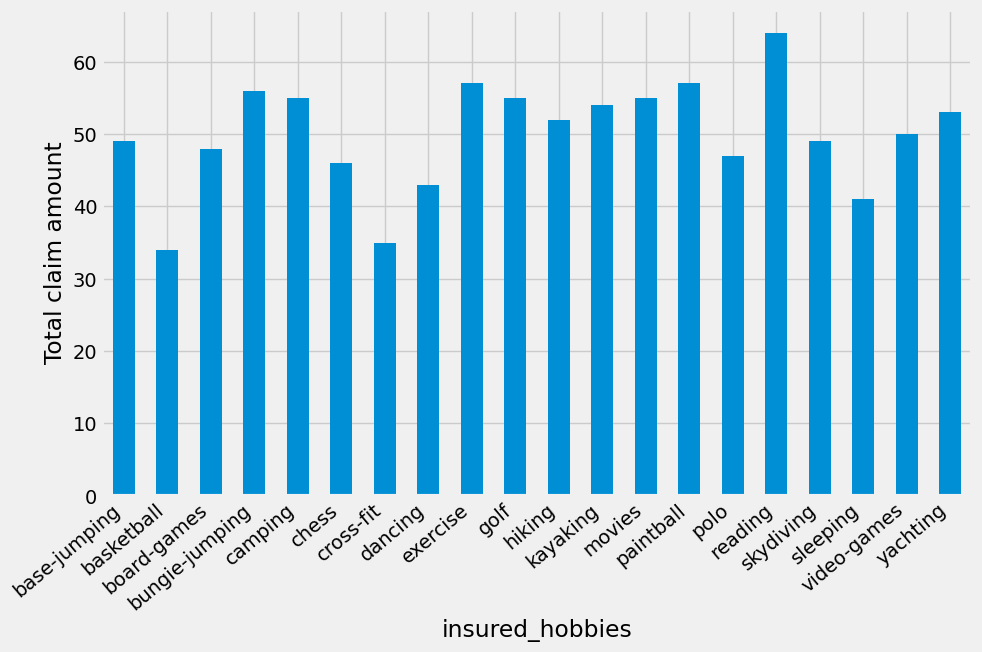

In [80]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [89]:
df = df.drop(columns = [
    'policy_number',
    'policy_csl',
    'insured_zip',
    'policy_bind_date',
    'incident_date',
    'incident_location',
    'auto_year',
    'incident_hour_of_the_day'])

In [90]:
from sklearn.preprocessing import LabelEncoder

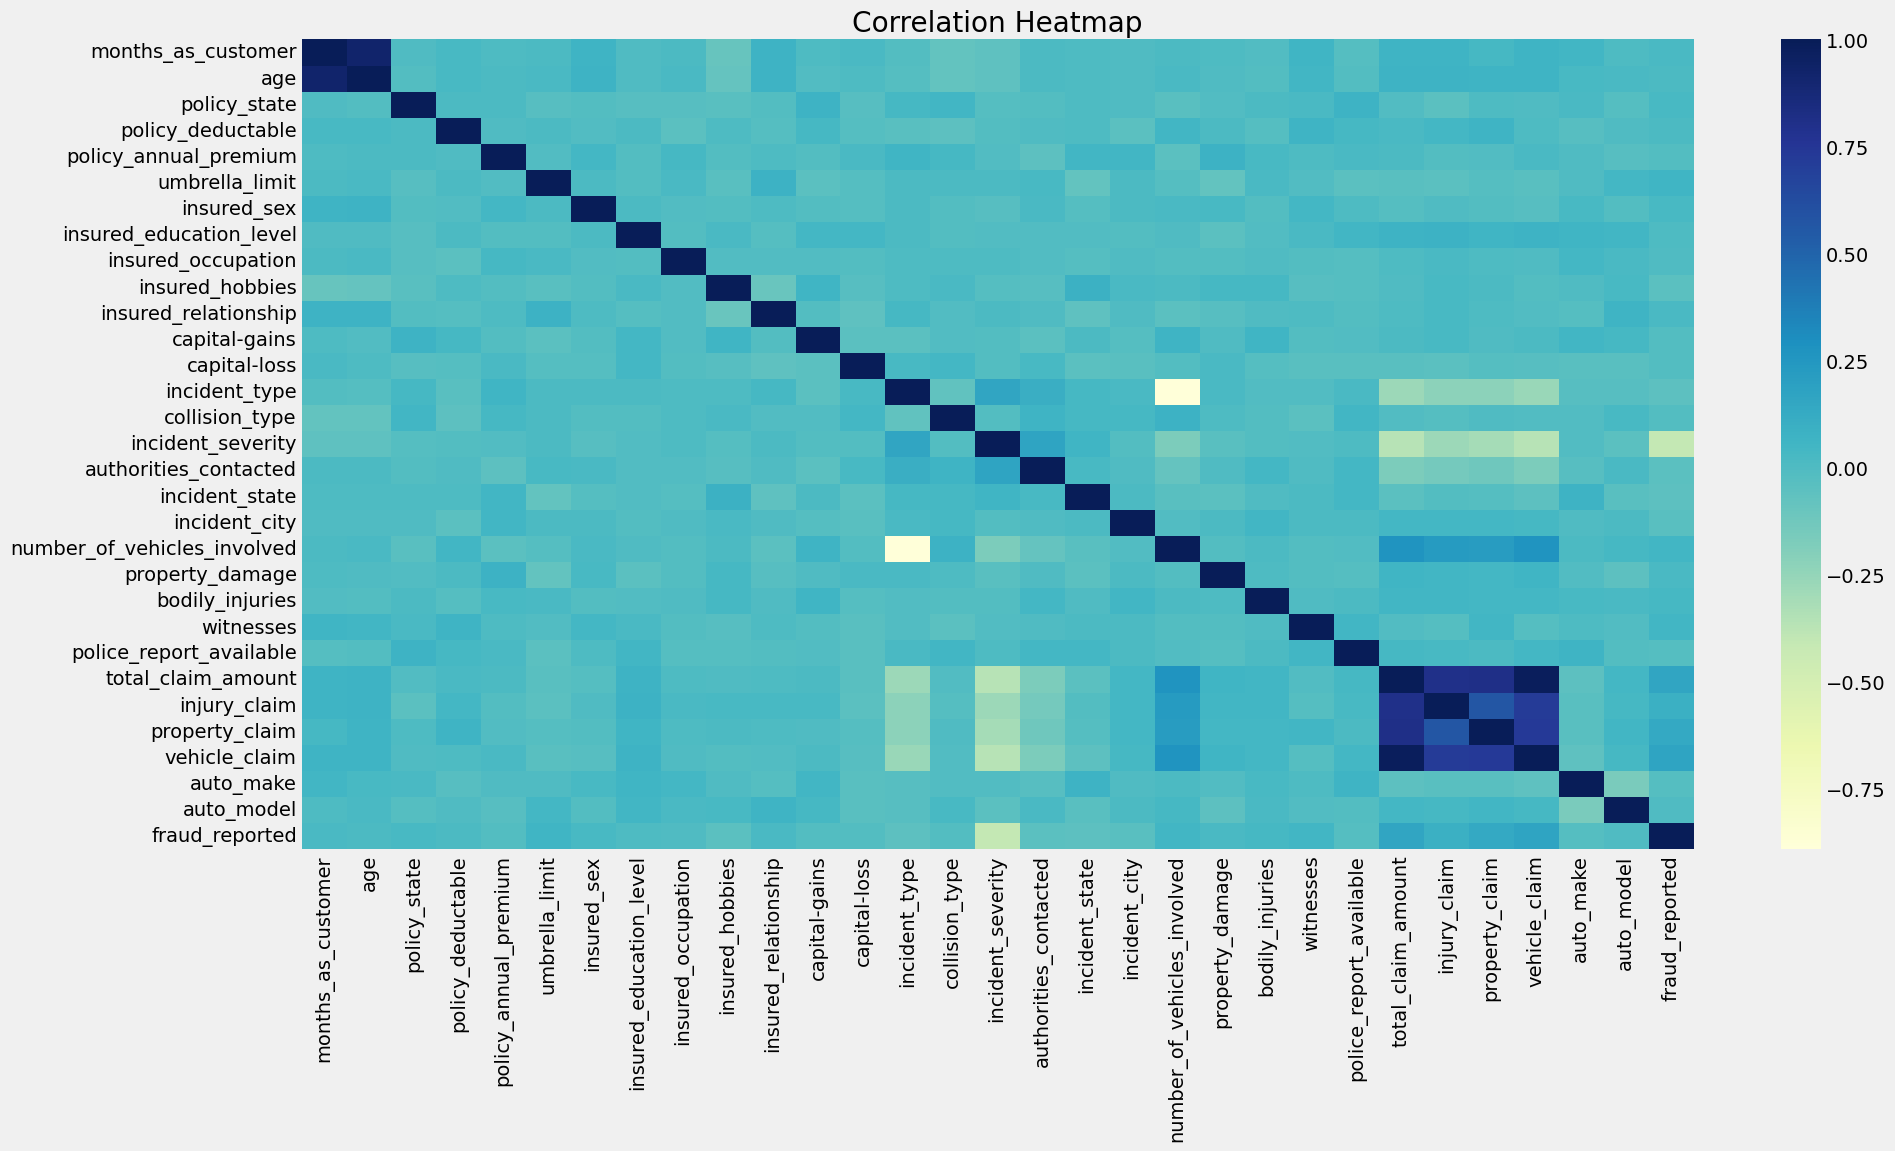

In [91]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

Can see some strong correlation between some features and we can ignore/remove them

In [94]:
df.reset_index()

index  months_as_customer  age  policy_state  policy_deductable  \
0        0                 328   48             2               1000   
1        1                 228   42             1               2000   
2        2                 134   29             2               2000   
3        3                 256   41             0               2000   
4        4                 228   44             0               1000   
..     ...                 ...  ...           ...                ...   
995    995                   3   38             2               1000   
996    996                 285   41             0               1000   
997    997                 130   34             2                500   
998    998                 458   62             0               2000   
999    999                 456   60             2               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            0   
3                  1415.74         6000000            0   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            0   
996                1436.79               0            0   
997                1383.49         3000000            0   
998                1356.92         5000000            1   
999                 766.19               0            0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                          4                   2               17   
1                          4                   6               15   
2                          6                  11                2   
3                          6                   1                2   
4                          0                  11                2   
..                       ...                 ...              ...   
995                        5                   2               13   
996                        6                   9               17   
997                        5                   1                3   
998                        0                   5                0   
999                        0                  11               11   

     insured_relationship  capital-gains  capital-loss  incident_type  \
0                       0          53300             0              2   
1                       2              0             0              3   
2                       3          35100             0              0   
3                       4          48900        -62400              2   
4                       4          66000        -46000              3   
..                    ...            ...           ...            ...   
995                     4              0             0              2   
996                     5          70900             0              2   
997                     2          35100             0              0   
998                     5              0             0              2   
999                     0              0             0              1   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0                 2                  0                      4               4   
1                 1                  1                      4               5   
2                 1                  1                      4               1   
3                 0                  0                      4               2   
4                 1                  1                      2               1   
..              ...                ...                    ...             ...   
995               0                  1                      1               0   
996               1                  0                      1               4

In [102]:
df_new = df[['auto_make','incident_city','insured_sex',\
       'insured_relationship','fraud_reported', 'auto_model',\
       'policy_state','policy_annual_premium','umbrella_limit',\
       'incident_type','collision_type','incident_severity',\
       'authorities_contacted','incident_state','number_of_vehicles_involved','property_damage',\
       'bodily_injuries','witnesses','police_report_available',\
       'vehicle_claim', 'total_claim_amount','injury_claim','property_claim',\
       'age']]

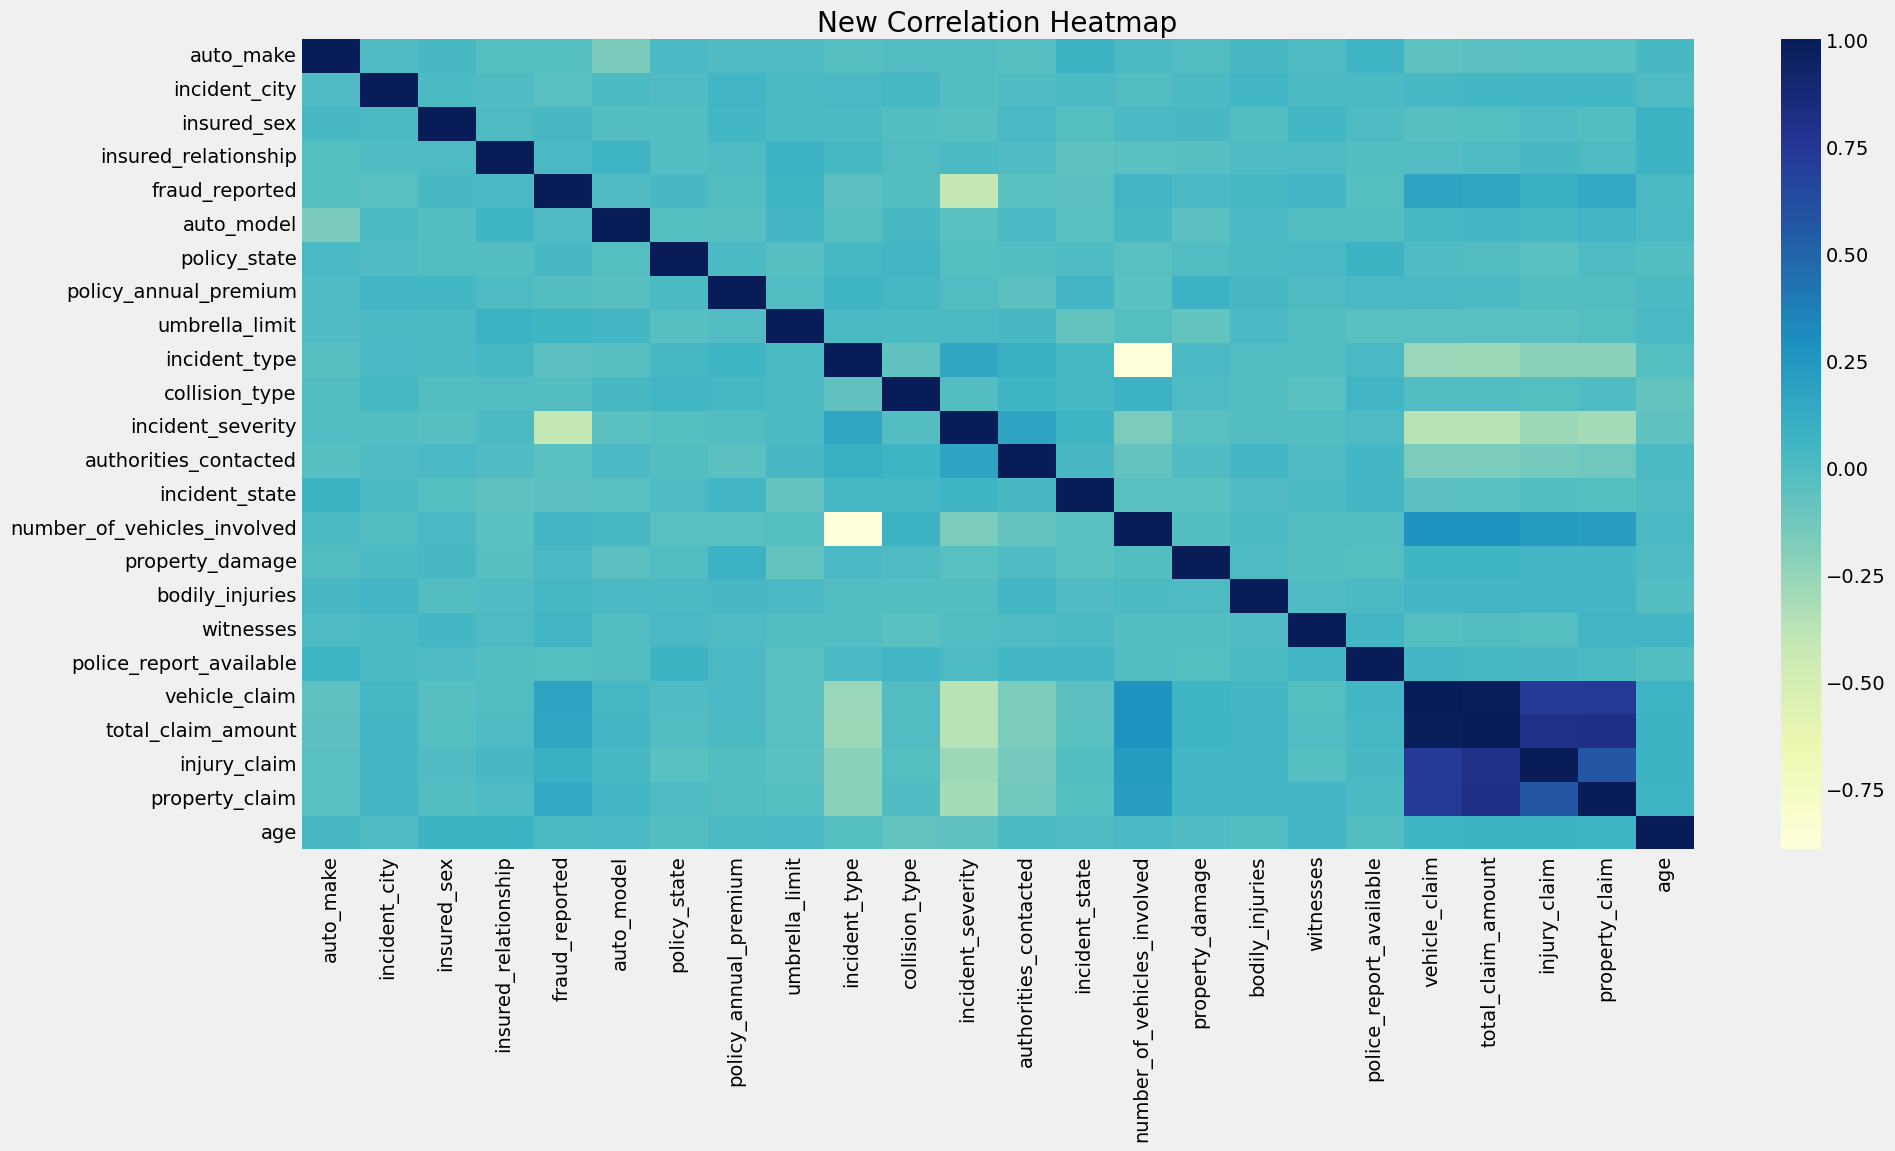

In [103]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),cmap="YlGnBu")
plt.title("New Correlation Heatmap")
plt.show()

In [104]:
def conf_matrix(y_test,y_pred):
    con_matrix = confusion_matrix(y_test,y_pred)
    con_matrix = pd.DataFrame(con_matrix,range(2),range(2))

    plt.figure(figsize=(5,5))
    plt.title("Confusion Matrix")
    sns.heatmap(con_matrix,annot=True,cbar=False,fmt='g')

**Data Modeling**

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

In [107]:
X = df_new.drop('fraud_reported',axis=1)
y = df_new[['fraud_reported']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 23), (250, 23), (750, 1), (250, 1))

**Logistic Regression**

Accuracy of thie model:		 0.756


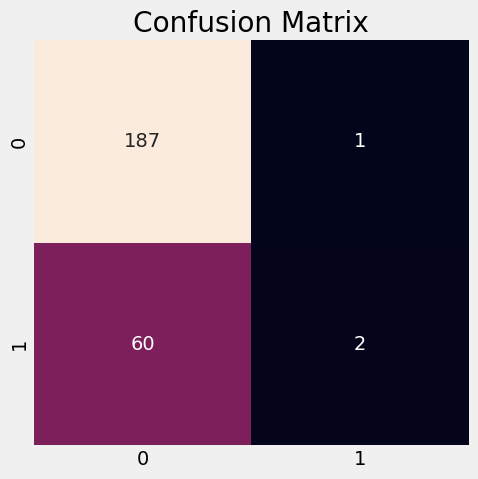

In [108]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

acc_lr=accuracy_score(y_test, lr_pred)
print("Accuracy of thie model:\t\t",acc_lr)
conf_matrix(y_test,lr_pred)

**RandomForest Classifier**

Accuracy of thie model:		 0.8


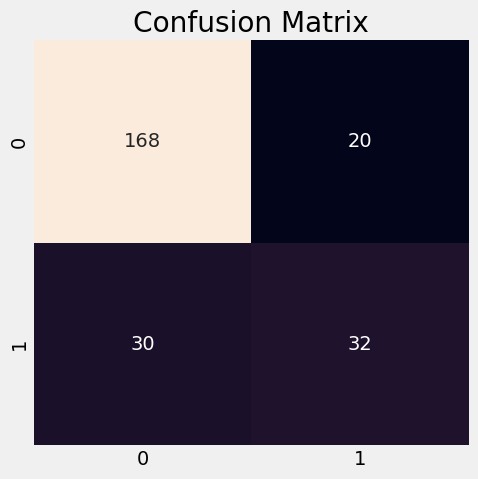

In [109]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

acc_rfc=accuracy_score(y_test, rfc_pred)
print("Accuracy of thie model:\t\t",acc_rfc)
conf_matrix(y_test,rfc_pred)

The dataset is extremely imbalanced and will not give accurate information. This can be overcome by one of the two ways :

Upscale the Minority Class    (FraudFound ==1) in this case

Downsample the Majority Class (FraudFound ==0) in this case

1. Upscale the Minority Class

In [110]:
n = df_new.fraud_reported.value_counts()[0]

df_majority = df_new[df_new.fraud_reported==0]
df_minority = df_new[df_new.fraud_reported==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples = n,random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.fraud_reported.value_counts()

fraud_reported
0    753
1    753
Name: count, dtype: int64

In [111]:
X = df_upsampled.drop('fraud_reported',axis=1)
y = df_upsampled[['fraud_reported']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1129, 23), (377, 23), (1129, 1), (377, 1))

**Logistic Regression**

Accuracy of thie model:		 0.5755968169761273


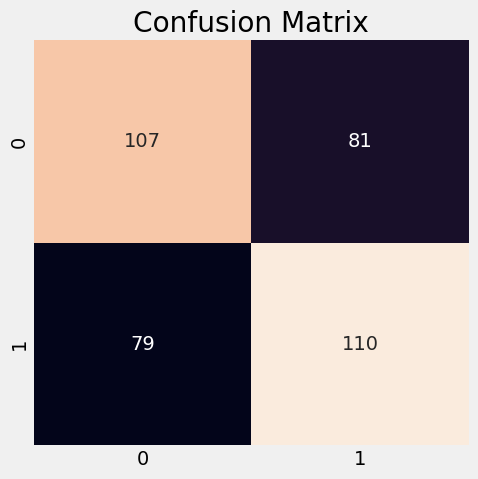

In [112]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_upscale_pred = lr.predict(X_test)

acc_lr_upscale=accuracy_score(y_test, lr_upscale_pred)
print("Accuracy of thie model:\t\t",acc_lr_upscale)
conf_matrix(y_test,lr_upscale_pred)

**RandomForest Classifier**

Accuracy of thie model:		 0.9310344827586207


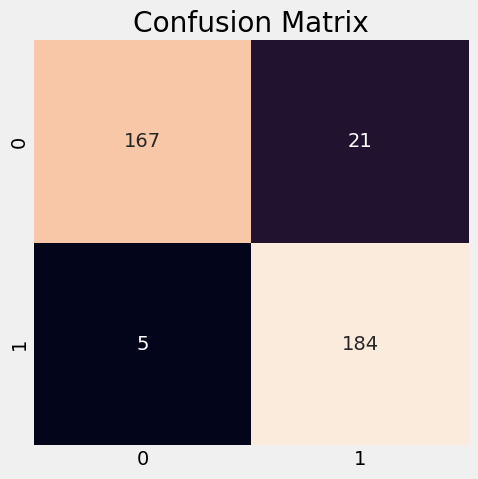

In [113]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_upscale_pred = rfc.predict(X_test)

acc_rfc_upscale=accuracy_score(y_test, rfc_upscale_pred)
print("Accuracy of thie model:\t\t",acc_rfc_upscale)
conf_matrix(y_test,rfc_upscale_pred)

DownSample Majority Class

In [114]:
n = df_new.fraud_reported.value_counts()[1]

df_majority = df_new[df_new.fraud_reported==0]
df_minority = df_new[df_new.fraud_reported==1]

df_majority_downsampled = resample(df_majority,replace=False,n_samples = n,random_state=42)

df_downsampled = pd.concat([df_minority,df_majority_downsampled])
df_downsampled.fraud_reported.value_counts()

fraud_reported
1    247
0    247
Name: count, dtype: int64

In [115]:
X = df_downsampled.drop('fraud_reported',axis=1)
y = df_downsampled[['fraud_reported']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((370, 23), (124, 23), (370, 1), (124, 1))

Logistic Regression

Accuracy of thie model:		 0.5725806451612904


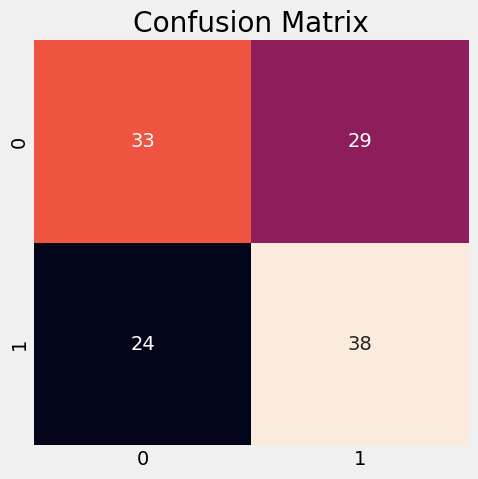

In [116]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_downscale_pred = lr.predict(X_test)

acc_lr_downscale=accuracy_score(y_test, lr_downscale_pred)
print("Accuracy of thie model:\t\t",acc_lr_downscale)
conf_matrix(y_test,lr_downscale_pred)

RandomForest Classifier

Accuracy of thie model:		 0.6693548387096774


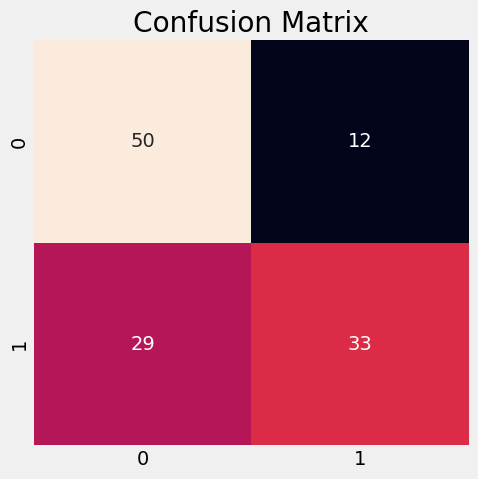

In [117]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_downscale_pred = rfc.predict(X_test)

acc_rfc_downscale=accuracy_score(y_test, rfc_downscale_pred)
print("Accuracy of thie model:\t\t",acc_rfc_downscale)
conf_matrix(y_test,rfc_downscale_pred)

**Comparison of Various Models**

In [118]:
data = {'Model':['Logistic Regression','UpScale Logistic Regression','DownScale Logistic Regression',
                 'RandomForest Classifier','UpScale RandomForest Classifier','DownScale RandomForest Classifier'],

        'Accuracy Score':[acc_lr,acc_lr_upscale,acc_lr_downscale,acc_rfc,acc_rfc_upscale,acc_rfc_downscale]}

comparision_table=pd.DataFrame(data)
print(comparision_table)

                               Model  Accuracy Score
0                Logistic Regression        0.756000
1        UpScale Logistic Regression        0.575597
2      DownScale Logistic Regression        0.572581
3            RandomForest Classifier        0.800000
4    UpScale RandomForest Classifier        0.931034
5  DownScale RandomForest Classifier        0.669355


In [213]:
# Checking numeric columns
df._get_numeric_data().head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  number_of_vehicles_involved  property_damage  \
0              1                            1                1   
1              5                            1                0   
2              1                            3                0   
3              0                            1                0   
4              0                            1                0   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                1          2                        1               71610   
1                0          0                        0                5070   
2                2          3                        0               34650   
3                1          2                        0               63400   
4                0          1                        0                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  fraud_reported  
0          6510           13020          52080         10               1  
1           780             780           3510          8               1  
2          7700            3850          23100          4               0  
3          6340            6340          50720          3               1  
4          1300             650           4550          0               0

In [214]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'fraud_reported'],
      dtype='object')

In [215]:
# checking categorcial columns
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

**Applying one-hot encoding to convert all categorical variables except out target variables**

'collision_type', 'property_damage', 'police_report_available', 'fraud_reported'

In [224]:
dummies = pd.get_dummies(df[[
    'policy_state',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city']])

In [225]:
dummies = dummies.join(df[[
    'collision_type',
    'property_damage',
    'police_report_available',
    "fraud_reported"]])

dummies.head()

policy_state  insured_sex  insured_education_level  insured_occupation  \
0             2            1                        4                   2   
1             1            1                        4                   6   
2             2            0                        6                  11   
3             0            0                        6                   1   
4             0            1                        0                  11   

   insured_hobbies  insured_relationship  incident_type  incident_severity  \
0               17                     0              2                  0   
1               15                     2              3                  1   
2                2                     3              0                  1   
3                2                     4              2                  0   
4                2                     4              3                  1   

   authorities_contacted  incident_state  incident_city  collision_type  \
0                      4               4              1               2   
1                      4               5              5               1   
2                      4               1              1               1   
3                      4               2              0               0   
4                      2               1              0               1   

   property_damage  police_report_available  fraud_reported  
0                1                        1               1  
1                0                        0               1  
2                0                        0               0  
3                0                        0               1  
4                0                        0               0

In [226]:
X = dummies.iloc[:, 0:-1]  # predictor variables
y = dummies.iloc[:, -1]  # target variable

In [227]:
len(X.columns)

14

In [228]:
X.head(5)

policy_state  insured_sex  insured_education_level  insured_occupation  \
0             2            1                        4                   2   
1             1            1                        4                   6   
2             2            0                        6                  11   
3             0            0                        6                   1   
4             0            1                        0                  11   

   insured_hobbies  insured_relationship  incident_type  incident_severity  \
0               17                     0              2                  0   
1               15                     2              3                  1   
2                2                     3              0                  1   
3                2                     4              2                  0   
4                2                     4              3                  1   

   authorities_contacted  incident_state  incident_city  collision_type  \
0                      4               4              1               2   
1                      4               5              5               1   
2                      4               1              1               1   
3                      4               2              0               0   
4                      2               1              0               1   

   property_damage  police_report_available  
0                1                        1  
1                0                        0  
2                0                        0  
3                0                        0  
4                0                        0

In [229]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

**Label encoding**

In [230]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
from pylab import rcParams

In [231]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']]

collision_type  collision_en
0                 2             2
1                 1             1
2                 1             1
3                 0             0
4                 1             1
..              ...           ...
995               0             0
996               1             1
997               2             2
998               1             1
999               1             1

[1000 rows x 2 columns]

In [232]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

In [233]:
X.head(10)

policy_state  insured_sex  insured_education_level  insured_occupation  \
0             2            1                        4                   2   
1             1            1                        4                   6   
2             2            0                        6                  11   
3             0            0                        6                   1   
4             0            1                        0                  11   
5             2            0                        6                  12   
6             1            1                        6                   9   
7             0            1                        0                  12   
8             0            0                        6                   7   
9             0            1                        6                   8   

   insured_hobbies  insured_relationship  incident_type  incident_severity  \
0               17                     0              2                  0   
1               15                     2              3                  1   
2                2                     3              0                  1   
3                2                     4              2                  0   
4                2                     4              3                  1   
5                3                     4              0                  0   
6                2                     0              0                  1   
7                0                     4              0                  2   
8                9                     3              2                  2   
9                4                     5              2                  2   

   authorities_contacted  incident_state  incident_city  collision_type  \
0                      4               4              1               2   
1                      4               5              5               1   
2                      4               1              1               1   
3                      4               2              0               0   
4                      2               1              0               1   
5                      1               4              0               1   
6                      4               1              6               0   
7                      4               5              1               0   
8                      4               6              0               0   
9                      3               0              2               1   

   property_damage  police_report_available  collision_en  
0                1                        1             2  
1                0                        0             1  
2                0                        0             1  
3                0                        0             0  
4                0                        0             1  
5                0                        0             1  
6                0                        0             0  
7                0                        1             0  
8                0                        1             0  
9                0                        0             1

In [234]:
X = X.drop(columns = ['collision_type'])
X.head(5)

policy_state  insured_sex  insured_education_level  insured_occupation  \
0             2            1                        4                   2   
1             1            1                        4                   6   
2             2            0                        6                  11   
3             0            0                        6                   1   
4             0            1                        0                  11   

   insured_hobbies  insured_relationship  incident_type  incident_severity  \
0               17                     0              2                  0   
1               15                     2              3                  1   
2                2                     3              0                  1   
3                2                     4              2                  0   
4                2                     4              3                  1   

   authorities_contacted  incident_state  incident_city  property_damage  \
0                      4               4              1                1   
1                      4               5              5                0   
2                      4               1              1                0   
3                      4               2              0                0   
4                      2               1              0                0   

   police_report_available  collision_en  
0                        1             2  
1                        0             1  
2                        0             1  
3                        0             0  
4                        0             1

In [235]:
X = pd.concat([X, df._get_numeric_data()], axis=1)  # joining numeric columns
X.head(5)

policy_state  insured_sex  insured_education_level  insured_occupation  \
0             2            1                        4                   2   
1             1            1                        4                   6   
2             2            0                        6                  11   
3             0            0                        6                   1   
4             0            1                        0                  11   

   insured_hobbies  insured_relationship  incident_type  incident_severity  \
0               17                     0              2                  0   
1               15                     2              3                  1   
2                2                     3              0                  1   
3                2                     4              2                  0   
4                2                     4              3                  1   

   authorities_contacted  incident_state  incident_city  property_damage  \
0                      4               4              1                1   
1                      4               5              5                0   
2                      4               1              1                0   
3                      4               2              0                0   
4                      2               1              0                0   

   police_report_available  collision_en  months_as_customer  age  \
0                        1             2                 328   48   
1                        0             1                 228   42   
2                        0             1                 134   29   
3                        0             0                 256   41   
4                        0             1                 228   44   

   policy_state  policy_deductable  policy_annual_premium  umbrella_limit  \
0             2               1000                1406.91               0   
1             1               2000                1197.22         5000000   
2             2               2000                1413.14         5000000   
3             0               2000                1415.74         6000000   
4             0               1000                1583.91         6000000   

   insured_sex  insured_education_level  insured_occupation  insured_hobbies  \
0            1                        4                   2               17   
1            1                        4                   6               15   
2            0                        6                  11                2   
3            0                        6                   1                2   
4            1                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  number_of_vehicles_involved  property_damage  \
0              1                            1                1   
1              5                            1                0   
2              1                            3                0   
3              0                            1                0   
4              0       

In [236]:
X.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'property_damage',
       'police_report_available', 'collision_en', 'months_as_customer', 'age',
       'policy_state', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'fraud_reported'],
      dtype='object')

In [237]:
X = X.drop(columns = ['fraud_reported'])  # dropping target variable 'fraud_reported'
X.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'property_damage',
       'police_report_available', 'collision_en', 'months_as_customer', 'age',
       'policy_state', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make'],
      dtype='object')

We now have a dataset that we could use to evaluate an algorithm sensitive to missing values like LDA.



In [238]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [239]:
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()

In [240]:
kfold = KFold(n_splits=5, shuffle=True,random_state=7)

In [241]:
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.7670000000000001


In [242]:
print("Accuracy: %0.2f (+/- %0.2f)" % (result.mean(), result.std() * 2))

Accuracy: 0.77 (+/- 0.03)


77 % cross validation score without standardizing the data. Above is the mean score and the 95% confidence interval of the score estimate. This looks good to go for other Classification methods.

**Creating a Training Set for the Data Set**

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


**Random Forest Classification**

In [244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics

In [245]:
# Baseline Random forest based Model
rfc = RandomForestClassifier(n_estimators=200)

kfold = KFold(n_splits=5, shuffle=True,random_state=7)
result2 = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')
print(result2.mean())

0.78875


Here, we see that, Random Forest baseline model unable to provide greater accuracy. We will check on ther classifier to compare. Before doing so,let's check if any anomalies/outliers are present in data.




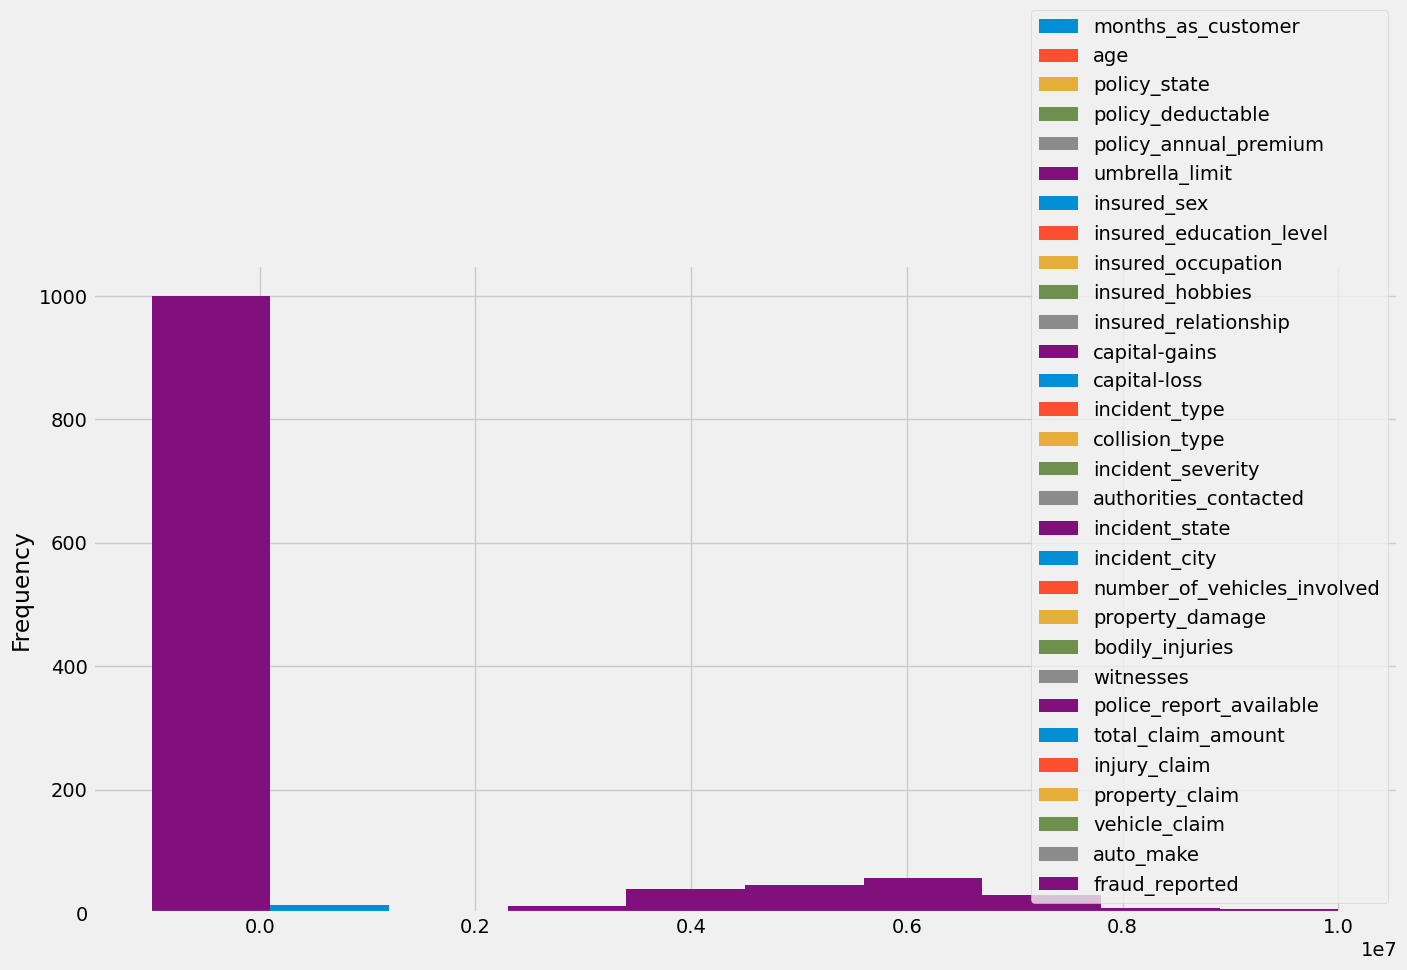

In [246]:
# Generate a Histogram plot for anomaly detection
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [15, 8]
df.plot(kind='hist')
plt.show()

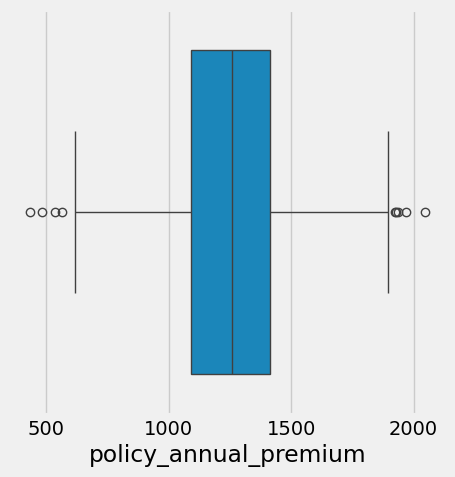

In [247]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.boxplot(x=X.policy_annual_premium)
plt.show()

Outliers are visible from the above plot from both Q1 and Q3 quartiles above the whiskers.

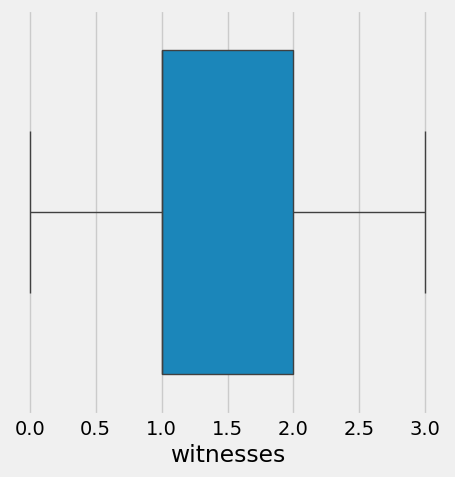

In [248]:
sns.boxplot(x=X.witnesses)
plt.show()

Missing median line represents data distribution is highly imbalanced.

**Standardizing the data and recheck the data distribution.**

In [250]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [251]:
X_train_scaled

array([[2.40180954, 2.00603344, 1.03082363, ..., 0.90375361, 1.84093195,
        2.24527771],
       [2.40180954, 2.00603344, 1.03082363, ..., 2.10117545, 1.60502305,
        0.        ],
       [1.20090477, 2.00603344, 2.57705908, ..., 2.69678424, 2.74665362,
        2.74422832],
       ...,
       [0.        , 0.        , 0.        , ..., 1.26980485, 2.58657258,
        2.24527771],
       [1.20090477, 2.00603344, 2.06164727, ..., 0.10960856, 0.22327092,
        1.74632711],
       [1.20090477, 2.00603344, 2.06164727, ..., 3.29239303, 2.51495738,
        1.74632711]])

In [252]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) # retaining columns names
X_train_scaled.head(5)

policy_state  insured_sex  insured_education_level  insured_occupation  \
0      2.401810     2.006033                 1.030824            0.749355   
1      2.401810     2.006033                 1.030824            0.749355   
2      1.200905     2.006033                 2.577059            1.498710   
3      1.200905     0.000000                 2.061647            1.748495   
4      0.000000     0.000000                 2.061647            2.747635   

   insured_hobbies  insured_relationship  incident_type  incident_severity  \
0         1.055604              1.189279       1.818427           1.068306   
1         2.287142              0.000000       0.000000           1.068306   
2         2.111208              0.594639       0.000000           2.136612   
3         1.935274              2.973197       1.818427           1.068306   
4         2.814944              1.783918       0.000000           2.136612   

   authorities_contacted  incident_state  incident_city  property_damage  \
0               0.000000        2.329522       0.982287              0.0   
1               0.000000        0.000000       0.000000              0.0   
2               0.000000        2.795427       2.946861              0.0   
3               0.653612        1.863618       1.473430              0.0   
4               0.653612        2.795427       1.473430              0.0   

   police_report_available  collision_en  months_as_customer       age  \
0                 0.000000      2.729263            0.548299  3.132848   
1                 0.000000      2.729263            1.173702  3.348906   
2                 0.000000      0.000000            0.385523  4.105111   
3                 0.000000      2.729263            2.544450  5.185403   
4                 2.162194      2.729263            0.316985  3.348906   

   policy_state  policy_deductable  policy_annual_premium  umbrella_limit  \
0      2.401810           3.280121               4.926916             0.0   
1      2.401810           3.280121               5.493052             0.0   
2      1.200905           1.640061               4.908188             0.0   
3      1.200905           1.640061               6.305148             0.0   
4      0.000000           0.820030               8.071499             0.0   

   insured_sex  insured_education_level  insured_occupation  insured_hobbies  \
0     2.006033                 1.030824            0.749355         1.055604   
1     2.006033                 1.030824            0.749355         2.287142   
2     2.006033                 2.577059            1.498710         2.111208   
3     0.000000                 2.061647            1.748495         1.935274   
4     0.000000                 2.061647            2.747635         2.814944   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0              1.189279       0.000000     -2.171862       1.818427   
1              0.000000       1.883400     -1.436117       0.000000   
2              0.594639       1.036406      0.000000       0.000000   
3              2.973197       0.000000     -1.934867       1.818427   
4              1.783918       0.000000      0.000000       0.000000   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0        2.729263           1.068306               0.000000        2.329522   
1        2.729263           1.068306               0.000000        0.000000   
2        0.000000           2.136612               0.000000        2.795427   
3        2.729263           1.068306               0.653612        1.863618   
4        2.729263           2.136612               0.653612        2.795427   

   incident_city  number_of_vehicles_involved  property_damage  \
0       0.982287                     0.980864              0.0   
1       0.000000                     2.942591              0.0   
2       2.946861                     2.942591              0.0   
3       1.473430                     0.980864              

<Axes: ylabel='Frequency'>

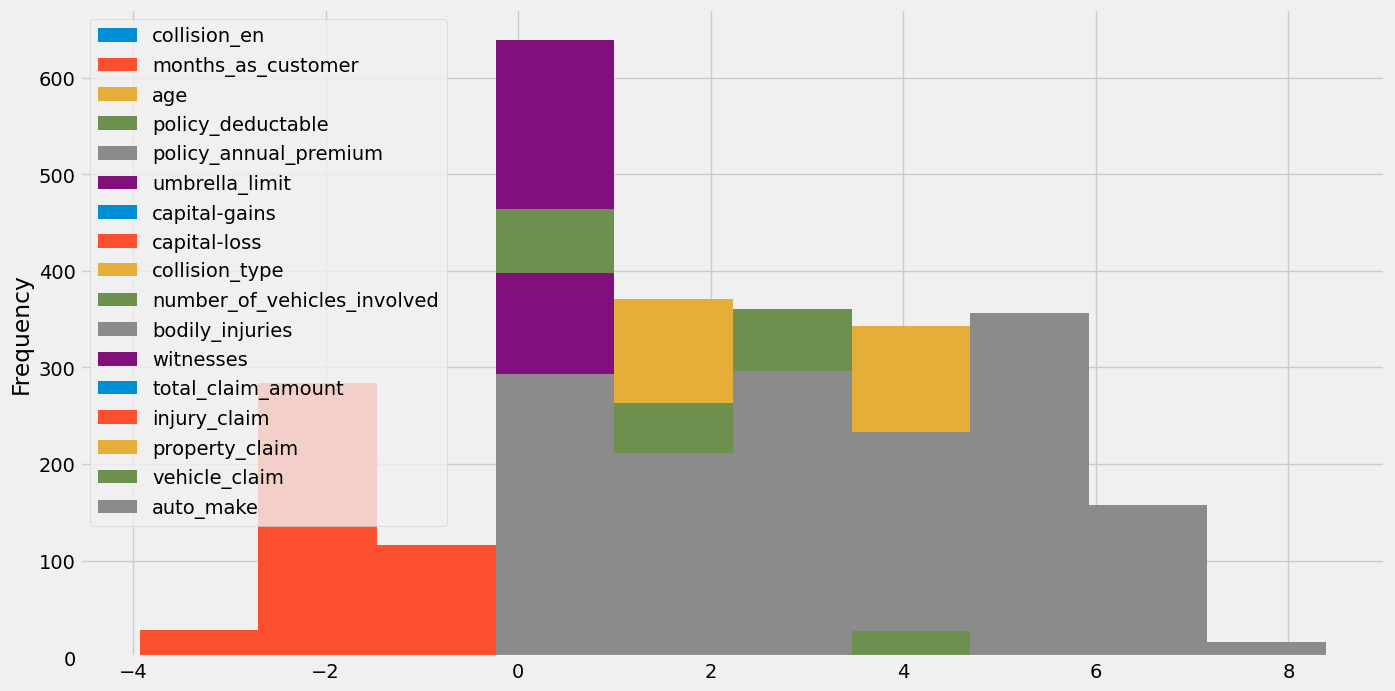

In [253]:
# Generate a Histogram plot on scaled data to check anomalies
plt.rcParams['figure.figsize'] = [15, 8]
X_train_scaled.plot(kind='hist')

In [254]:
x_train_scaled = pd.DataFrame.to_numpy(X_train_scaled) # converting to array for computational ease
x_train_scaled

array([[2.40180954, 2.00603344, 1.03082363, ..., 0.90375361, 1.84093195,
        2.24527771],
       [2.40180954, 2.00603344, 1.03082363, ..., 2.10117545, 1.60502305,
        0.        ],
       [1.20090477, 2.00603344, 2.57705908, ..., 2.69678424, 2.74665362,
        2.74422832],
       ...,
       [0.        , 0.        , 0.        , ..., 1.26980485, 2.58657258,
        2.24527771],
       [1.20090477, 2.00603344, 2.06164727, ..., 0.10960856, 0.22327092,
        1.74632711],
       [1.20090477, 2.00603344, 2.06164727, ..., 3.29239303, 2.51495738,
        1.74632711]])

In [255]:
pip install xgboost

In [256]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


Here the data is distributed and the anomalies are gone after standardization.

The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

In [257]:
xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

In [258]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))

In [259]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.783750 (0.059700)
XGB: 0.821250 (0.047451)
KNN: 0.747500 (0.049308)
DT: 0.771250 (0.038750)
SVM: 0.757500 (0.044441)
RF: 0.785000 (0.073058)
ADA: 0.798750 (0.050140)
LDA: 0.788750 (0.053459)
GNB: 0.728750 (0.059700)


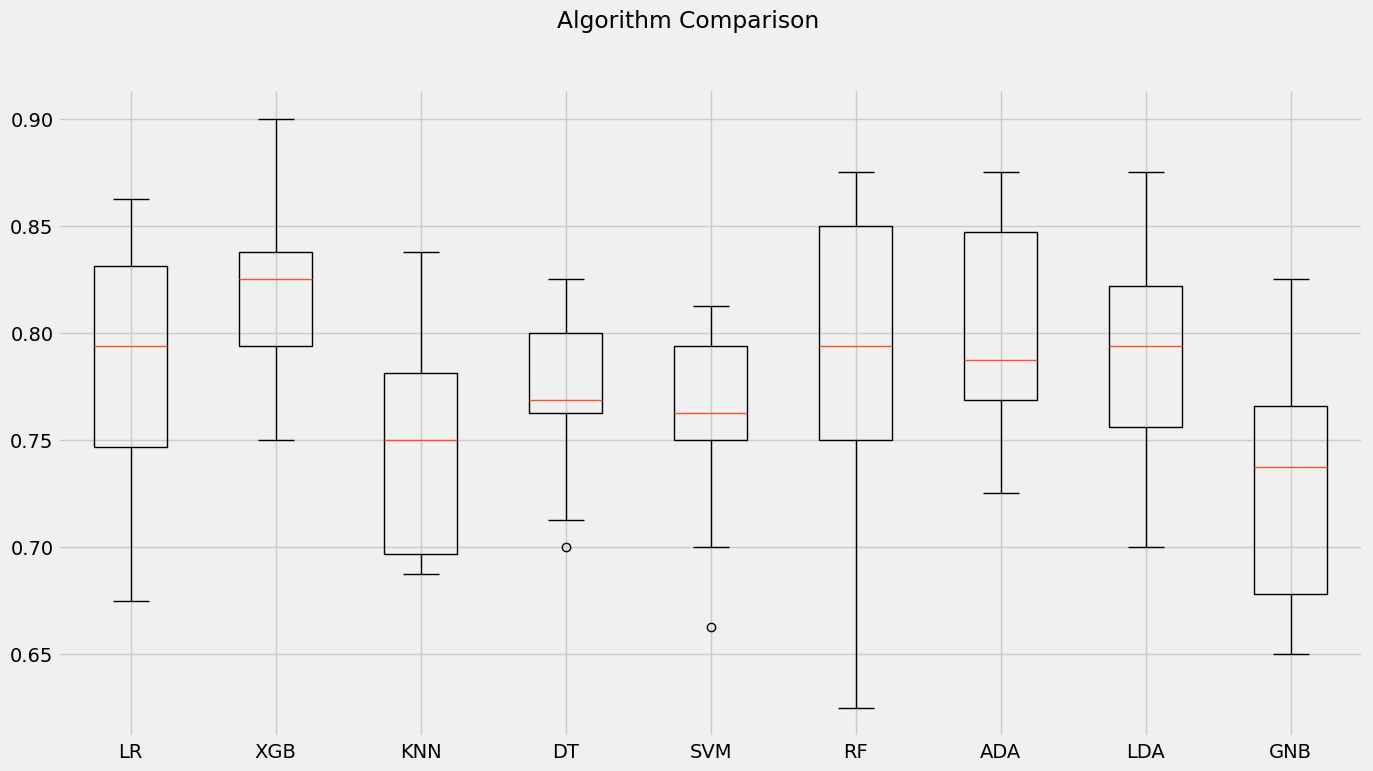

In [260]:
# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Above a list of each algorithm, the mean accuracy and the standard deviation accuracy and a box & whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm. It is clear that the inear Discriminant Analysis (78%) is leading the list. Logistics regression and XGB are almost close (82.62% and 82.87% respectively). We could see some noise / outlier in data in case of XGB. The LR box-plot is skewd one side with longer tail.

I will do some series of test to optimize the performance of XGB.

**VotingClassifier**

In [261]:
clf1= LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)
clf2 = XGBClassifier()

clf = [
    ('LR', clf1),
    ('XGB', clf2)]

In [262]:
#create our voting classifier, inputting our models
eclf= VotingClassifier(estimators=[
    ('LR', clf1),
    ('XGB', clf2)], voting='hard')

for clf, label in zip([clf1, clf2, eclf], [
    'Logistic Regression',
    'XGB Classifier',
    'Ensemble']):

    scores = cross_val_score(clf, x_train_scaled, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.78 (+/- 0.02) [Logistic Regression]
Accuracy: 0.81 (+/- 0.03) [XGB Classifier]
Accuracy: 0.77 (+/- 0.02) [Ensemble]


votingClassifier seleted LR as best class with the accuracy score 78%.

**XGBClassifier-GridSearch**

In [263]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

In [264]:
# fit model on all training data
xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [265]:
# make predictions for test data and evaluate
xgb_pred = xgb.predict(X_test_scaled)
predictions = [round(value) for value in xgb_pred]
accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.50%


In [266]:
# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:

    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_scaled)

    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)

    # eval model
    select_X_test = selection.transform(X_test_scaled)
    xgb_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in xgb_pred]
    accuracy = accuracy_score(y_test, xgb_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.000, n=43, Accuracy: 83.50%
Thresh=0.011, n=29, Accuracy: 83.50%
Thresh=0.013, n=28, Accuracy: 82.00%
Thresh=0.014, n=27, Accuracy: 82.00%
Thresh=0.016, n=26, Accuracy: 82.50%
Thresh=0.017, n=25, Accuracy: 84.00%
Thresh=0.017, n=24, Accuracy: 83.00%
Thresh=0.017, n=23, Accuracy: 84.00%
Thresh=0.017, n=22, Accuracy: 82.00%
Thresh=0.017, n=21, Accuracy: 83.50%
Thresh=0.020, n=20, Accuracy: 82.50%
Thresh=0.020, n=19, Accuracy: 81.50%
Thresh=0.020, n=18, Accuracy: 80.50%
Thresh=0.021, n=17, Accuracy: 82.00%
T

Let's check the important features the model has identified

In [270]:
from pprint import pprint
# Check parameters used
print('Parameters currently in use:\n')
pprint(x.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [271]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = [10, 6]

In [272]:
# grid search
max_depth = range(1, 11, 2)
print(max_depth)

range(1, 11, 2)


In [273]:
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [274]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')

Best: -0.378269 using {'max_depth': 1}
-0.378269 (0.068237) with: {'max_depth': 1}
-0.462509 (0.123767) with: {'max_depth': 3}
-0.558639 (0.156863) with: {'max_depth': 5}
-0.546725 (0.172082) with: {'max_depth': 7}
-0.559753 (0.144516) with: {'max_depth': 9}


Text(0, 0.5, 'Log Loss')

In [275]:
import numpy

n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(x_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best: -0.383369 using {'max_depth': 2, 'n_estimators': 50}
-0.383369 (0.071415) with: {'max_depth': 2, 'n_estimators': 50}
-0.404423 (0.081441) with: {'max_depth': 2, 'n_estimators': 100}
-0.425482 (0.093344) with: {'max_depth': 2, 'n_estimators': 150}
-0.450899 (0.099280) with: {'max_depth': 2, 'n_estimators': 200}
-0.458915 (0.111325) with: {'max_depth': 4, 'n_estimators': 50}
-0.538213 (0.149806) with: {'max_depth': 4, 'n_estimators': 100}
-0.581467 (0.174867) with: {'max_depth': 4, 'n_estimators': 150}
-0.612374 (0.187957) with: {'max_depth': 4, 'n_estimators': 200}
-0.480138 (0.125305) with: {'max_depth': 6, 'n_estimators': 50}
-0.539556 (0.146951) with: {'max_depth': 6, 'n_estimators': 100}
-0.570059 (0.159751) with: {'max_depth': 6, 'n_estimators': 150}
-0.586152 (0.168644) with: {'max_depth': 6, 'n_estimators': 200}
-0.503875 (0.159534) with: {'max_depth': 8, 'n_estimators': 50}
-0.552814 (0.194611) wit

Text(9.70833333333333, 0.5, 'Log Loss')

**Random Hyperparameter Grid**

In [276]:
from sklearn.metrics import brier_score_loss
xgb = XGBClassifier(objective='binary:logistic', random_state=7, n_jobs=-1)
xgb.fit(x_train_scaled, y_train)
scores = cross_val_score(estimator =xgb, X=x_train_scaled, y=y_train, cv=kfold, scoring='neg_brier_score' )
print('Brier loss:', "{0:.5f}".format(np.mean(scores)*-1))

Brier loss: 0.14071


In [277]:
print(xgb.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 7, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [279]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=9)],
    'max_depth': [i for i in range(3, 10)],
    'min_child_weight': [i for i in range(1, 7)],
    'subsample': [i/10.0 for i in range(6,11)],
    'colsample_bytree': [i/10.0 for i in range(6,11)]
}

# Create the randomised grid search model
# "n_iter = number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution"
rgs = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=200, cv=kfold,
                         random_state=7, n_jobs=-1,
                         scoring='neg_brier_score', return_train_score=True)
# Fit rgs
rgs.fit(x_train_scaled, y_train)

# Print results
print(rgs)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importan...
                                           random_state=7, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                    

In [280]:
best_score = rgs.best_score_
best_params = rgs.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.10429833565368232
Best params: 
colsample_bytree: 0.9
learning_rate: 0.01
max_depth: 8
min_child_weight: 6
n_estimators: 250
subsample: 0.9


In [281]:
# make predictions for test data and evaluate
rgs_pred = rgs.predict(X_test_scaled)

print('Accuracy: ', round(accuracy_score(y_test, rgs_pred)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, rgs_pred),3)))
print('Recall: ', round(recall_score(y_test, rgs_pred)*100, 2))
print('\n Classification Report:\n', classification_report(y_test, rgs_pred))


Accuracy:  82.5
Cohen Kappa: 0.559
Recall:  72.55

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       149
           1       0.64      0.73      0.68        51

    accuracy                           0.82       200
   macro avg       0.77      0.79      0.78       200
weighted avg       0.83      0.82      0.83       200



The XGB model provides imporved performance @ 82% with fitted model ( which means 1 in every 18 fraud reported are incorrect).

The recall score as 86% (almost 2 of every 10 fraud reported in reality are missed and 8 labeled as fraud). To calculate how many of the Actual Positives our model capture through labeling it as Positive (True Positive) and we used here to select our best model considering high cost associated with False Negative. So, higher the recall is better for our model here. f1 is balancing between precision and recall. Here, in our case False Negative and False Positive usually has business costs (tangible & intangible).



Validating fitted model accuracy for LogicticsRegressionCV



In [282]:
xgb = XGBClassifier()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.821250 (0.047451)


In [283]:
# Fit rgs
model.fit(x_train_scaled, y_train)

# make predictions for test data
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.50%


In [284]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, rgs_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.53


In [285]:
from sklearn.metrics import precision_recall_curve
from inspect import signature

plt.rcParams['figure.figsize'] = [10, 6]

precision, recall, _ = precision_recall_curve(y_test, rgs_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision), fontsize=12)

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.53')

In [286]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_test, rgs_pred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, rgs_pred)

# plot no skill
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.792


We see here that, model can measure the correct true negative predictions. The plot of the ROC Curve confirms the AUC interpretation of a skilful model for most probability thresholds.

In [287]:
from sklearn.metrics import confusion_matrix
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):

    print('Confusion matrix')

    print(cm)

    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(10,6))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [288]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rgs_pred)
np.set_printoptions(precision=2)

In [289]:
import seaborn
ax = seaborn.heatmap(cnf_matrix, xticklabels='Fraud_Y', yticklabels='Fraud_N', annot=True, square=True, cmap='Blues')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

From the confusion matrix we see that,

123 transactions were classified as valid that were actually valid 12 transactions were classified as fraud that were actually valid (type 1 error) 26 transactions were classified as valid that were fraud (type 2 error) 39 transactions were classified as fraud that were actually fraud. Err = {(26+12) / (123+12+26+39)}*100 = 19%

So, the algorithm misclassified 19% fraudulent transactions.

Let's check the accuracy after dimensionality reduction using LDA model.

In [291]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.057)
constant_filter.fit(X_train_scaled)

constant_columns = [column for column in X_train_scaled.columns
                    if column not in X_train_scaled.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


Let's check the correlated features in the training data.

In [292]:
correlated_features = set()
correlation_matrix = X_train_scaled.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

len(correlated_features)

19

In [293]:
print(correlated_features)

{'age', 'authorities_contacted', 'incident_type', 'incident_state', 'incident_city', 'policy_state', 'property_claim', 'collision_type', 'number_of_vehicles_involved', 'police_report_available', 'insured_sex', 'insured_occupation', 'injury_claim', 'insured_hobbies', 'property_damage', 'insured_relationship', 'insured_education_level', 'vehicle_claim', 'incident_severity'}


Important information can be found from the correlated features which is useful for insurance company to view at. So, will check the accuracy dropping these variables.

In [294]:
X.head(1)

policy_state  insured_sex  insured_education_level  insured_occupation  \
0             2            1                        4                   2   

   insured_hobbies  insured_relationship  incident_type  incident_severity  \
0               17                     0              2                  0   

   authorities_contacted  incident_state  incident_city  property_damage  \
0                      4               4              1                1   

   police_report_available  collision_en  months_as_customer  age  \
0                        1             2                 328   48   

   policy_state  policy_deductable  policy_annual_premium  umbrella_limit  \
0             2               1000                1406.91               0   

   insured_sex  insured_education_level  insured_occupation  insured_hobbies  \
0            1                        4                   2               17   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   

   incident_city  number_of_vehicles_involved  property_damage  \
0              1                            1                1   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                1          2                        1               71610   

   injury_claim  property_claim  vehicle_claim  auto_make  
0          6510           13020          52080         10

In [298]:
x = X.drop([
       'vehicle_claim',
        'injury_claim',
        'age',
        'property_claim',
        'number_of_vehicles_involved'], axis=1)


In [299]:
x.head(1)

policy_state  insured_sex  insured_education_level  insured_occupation  \
0             2            1                        4                   2   

   insured_hobbies  insured_relationship  incident_type  incident_severity  \
0               17                     0              2                  0   

   authorities_contacted  incident_state  incident_city  property_damage  \
0                      4               4              1                1   

   police_report_available  collision_en  months_as_customer  policy_state  \
0                        1             2                 328             2   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
0               1000                1406.91               0            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   

   incident_city  property_damage  bodily_injuries  witnesses  \
0              1                1                1          2   

   police_report_available  total_claim_amount  auto_make  
0                        1               71610         10

In [300]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(x_train), len(x_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


In [301]:
a_train_scaled = scaler.fit_transform(x_train)
a_test_scaled = scaler.transform(x_test)

In [302]:
xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=seed)
    cv_results = model_selection.cross_val_score(model, a_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.776250 (0.055467)
XGB: 0.818750 (0.061809)


Conclusion : There is no significant change in performance; so, will keep the fitted XGB model as the final model for this project.